In [226]:
#importing all the necessary modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [227]:
#loading the data and displaying the first 5 rows
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [228]:
#to show the data types of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [229]:
#to show the number of null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [230]:
#the data type of TotalCharges is String, but it's supposed to be a float
#converting it to float shows us the true number of missing values (using the 'coerce' keyword)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [231]:
#summarizing descriptive statistics for numerical features in the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


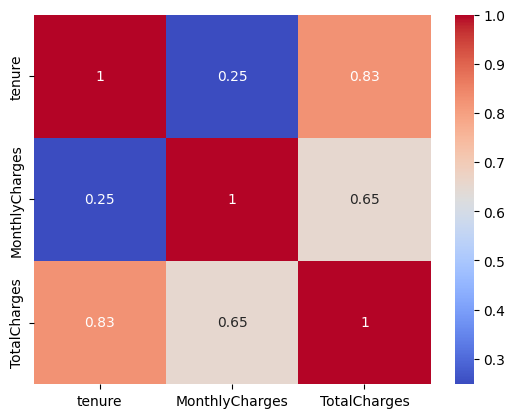

In [232]:
#heatmap that shows the correlation between numerical features
correlation = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.show()

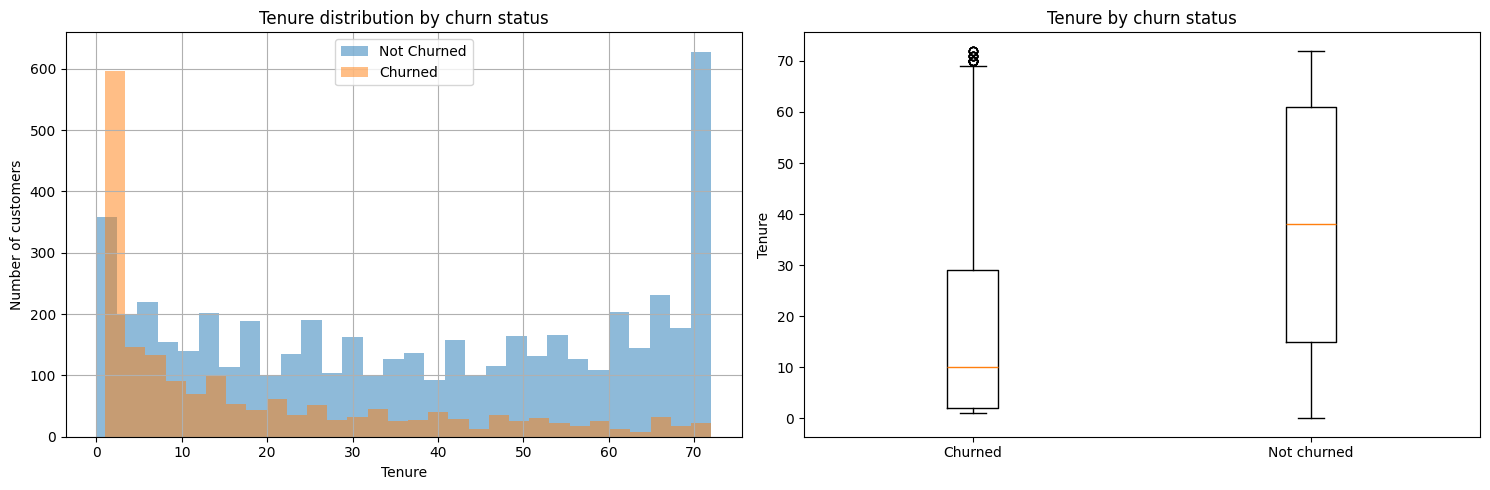

In [233]:
#histogram & boxplot of tenure distribution with churn

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df[df['Churn'] == 'No']['tenure'].hist(alpha=0.5, label='Not Churned', bins=30, ax=axes[0])
df[df['Churn'] == 'Yes']['tenure'].hist(alpha=0.5, label='Churned', bins=30, ax=axes[0])
axes[0].set_title('Tenure distribution by churn status')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Number of customers')
axes[0].legend()

axes[1].boxplot([
    df[df['Churn']=='Yes']['tenure'], 
    df[df['Churn']=='No']['tenure']
],
tick_labels=['Churned', 'Not churned']
)
axes[1].set_ylabel('Tenure')
axes[1].set_title('Tenure by churn status')
plt.tight_layout()
plt.show()

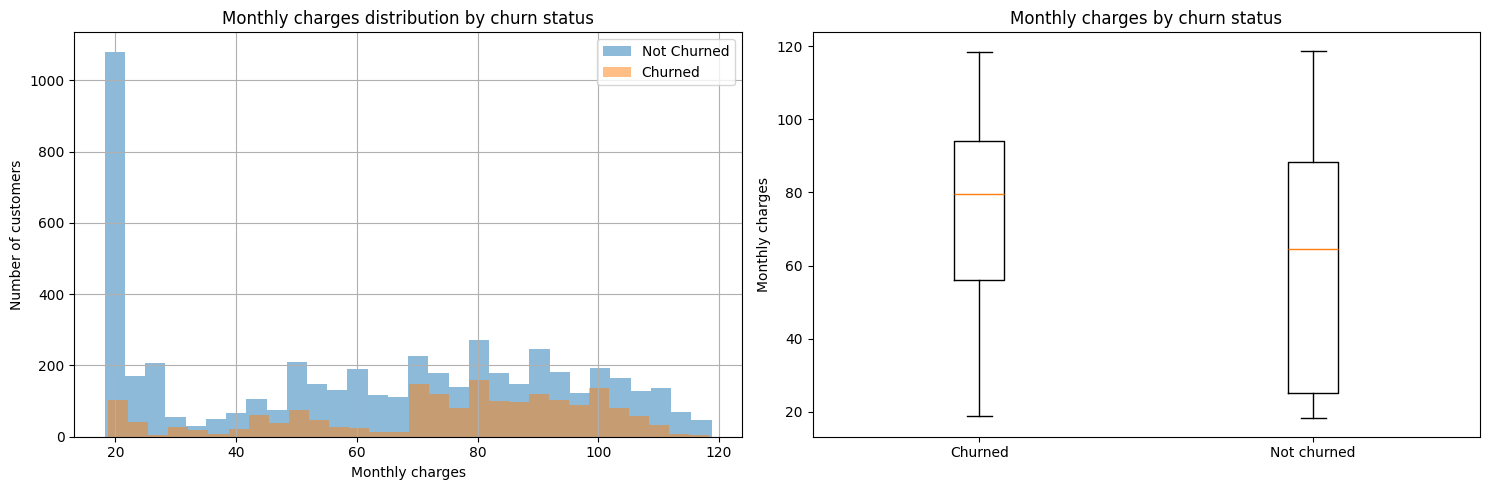

In [234]:
#histogram & boxplot of monthly charges distribution with churn

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df[df['Churn'] == 'No']['MonthlyCharges'].hist(alpha=0.5, label='Not Churned', bins=30, ax=axes[0])
df[df['Churn'] == 'Yes']['MonthlyCharges'].hist(alpha=0.5, label='Churned', bins=30, ax=axes[0])
axes[0].set_title('Monthly charges distribution by churn status')
axes[0].set_xlabel('Monthly charges')
axes[0].set_ylabel('Number of customers')
axes[0].legend()

axes[1].boxplot([
    df[df['Churn']=='Yes']['MonthlyCharges'], 
    df[df['Churn']=='No']['MonthlyCharges']
],
tick_labels=['Churned', 'Not churned']
)
axes[1].set_ylabel('Monthly charges')
axes[1].set_title('Monthly charges by churn status')
plt.tight_layout()
plt.show()

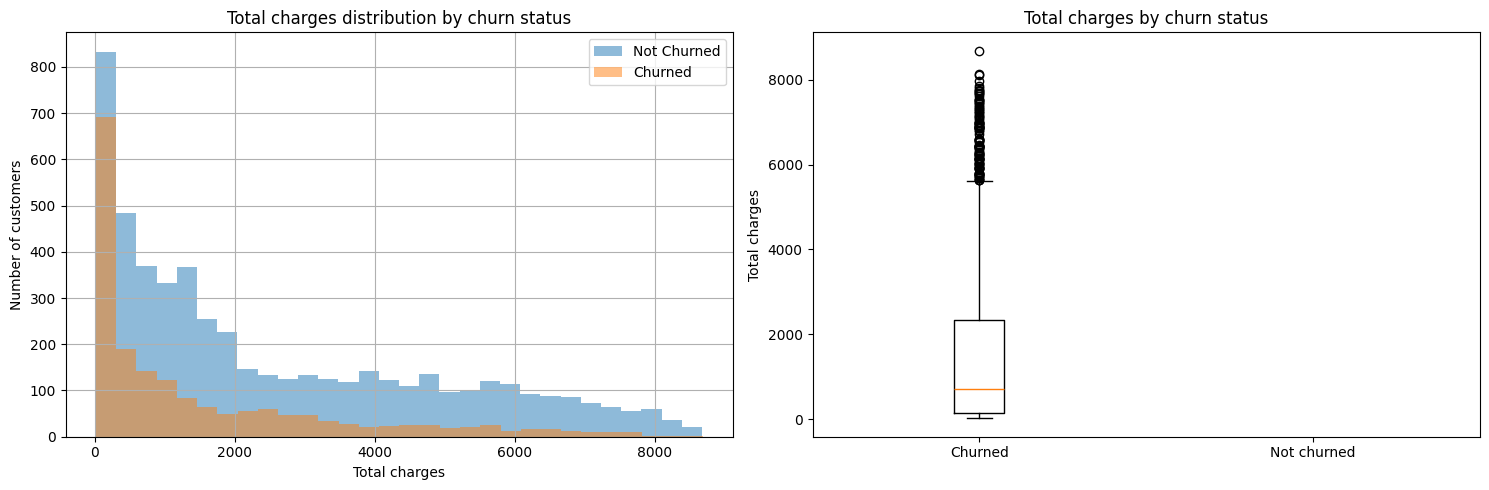

In [235]:
#histogram & boxplot of total charges distribution with churn

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df[df['Churn'] == 'No']['TotalCharges'].hist(alpha=0.5, label='Not Churned', bins=30, ax=axes[0])
df[df['Churn'] == 'Yes']['TotalCharges'].hist(alpha=0.5, label='Churned', bins=30, ax=axes[0])
axes[0].set_title('Total charges distribution by churn status')
axes[0].set_xlabel('Total charges')
axes[0].set_ylabel('Number of customers')
axes[0].legend()

#boxplots
axes[1].boxplot([
    df[df['Churn']=='Yes']['TotalCharges'], 
    df[df['Churn']=='No']['TotalCharges']
],
tick_labels=['Churned', 'Not churned']
)
axes[1].set_ylabel('Total charges')
axes[1].set_title('Total charges by churn status')
plt.tight_layout()
plt.show()

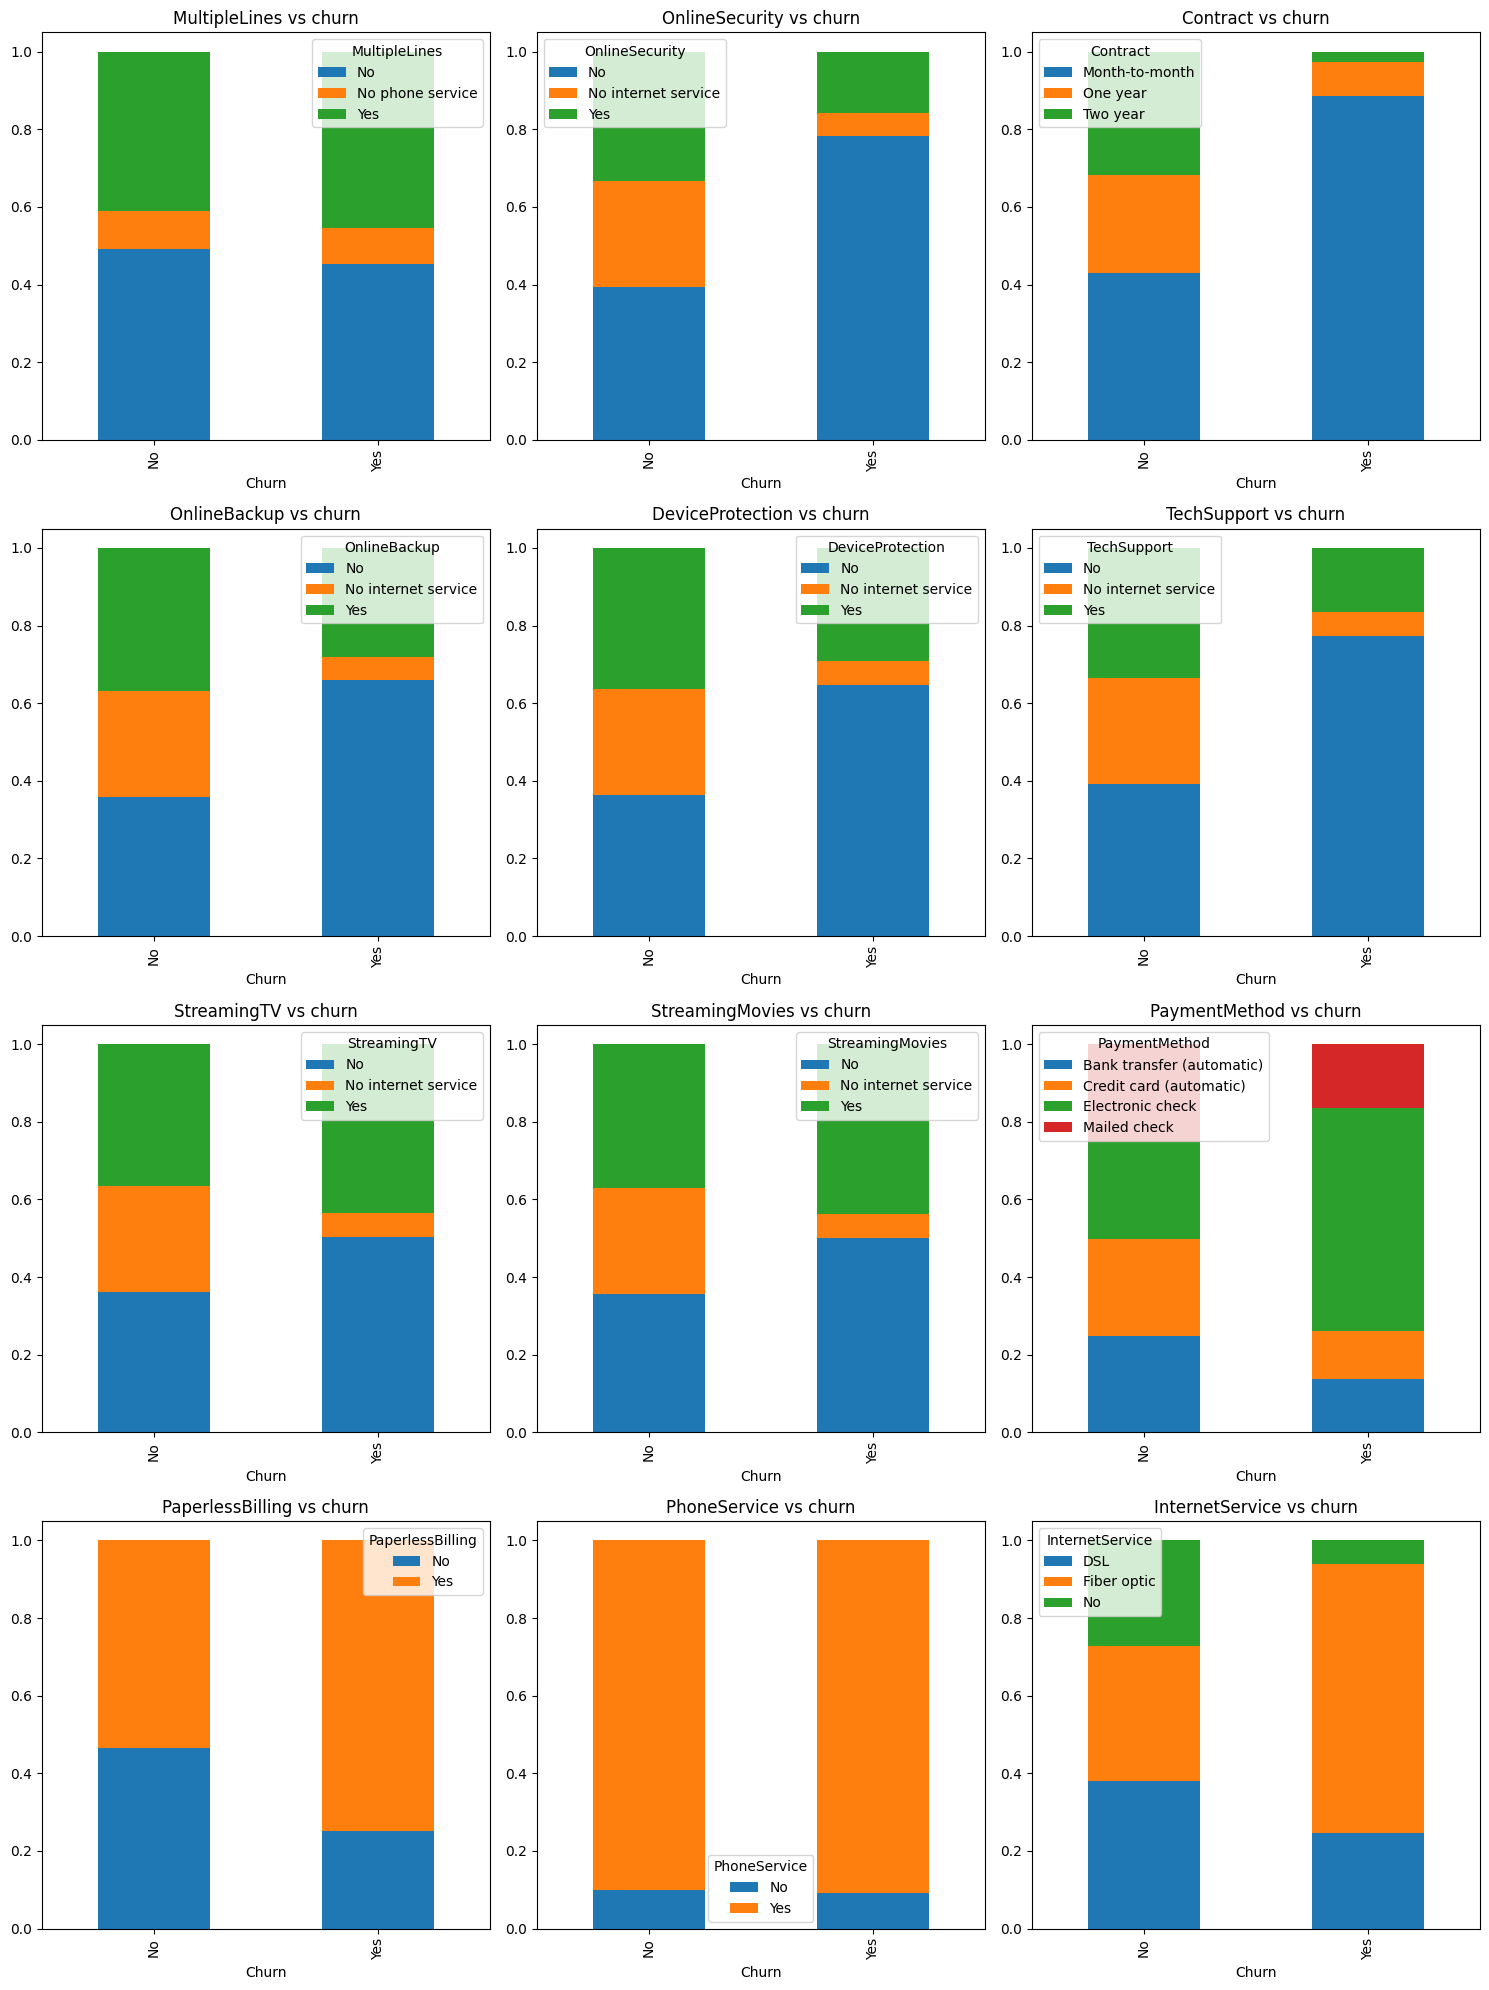

In [236]:
#stacked bar charts to show the relationships between different categorical features (services) and churn
services = ['MultipleLines', 'OnlineSecurity', 'Contract',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaymentMethod',
                    'PaperlessBilling', 'PhoneService', 'InternetService']

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
for i, service in enumerate(services):
    row, col = i // 3, i % 3
    crosstab = pd.crosstab(df['Churn'], df[service], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[row, col], title=f'{service} vs churn')
plt.tight_layout()
plt.show()

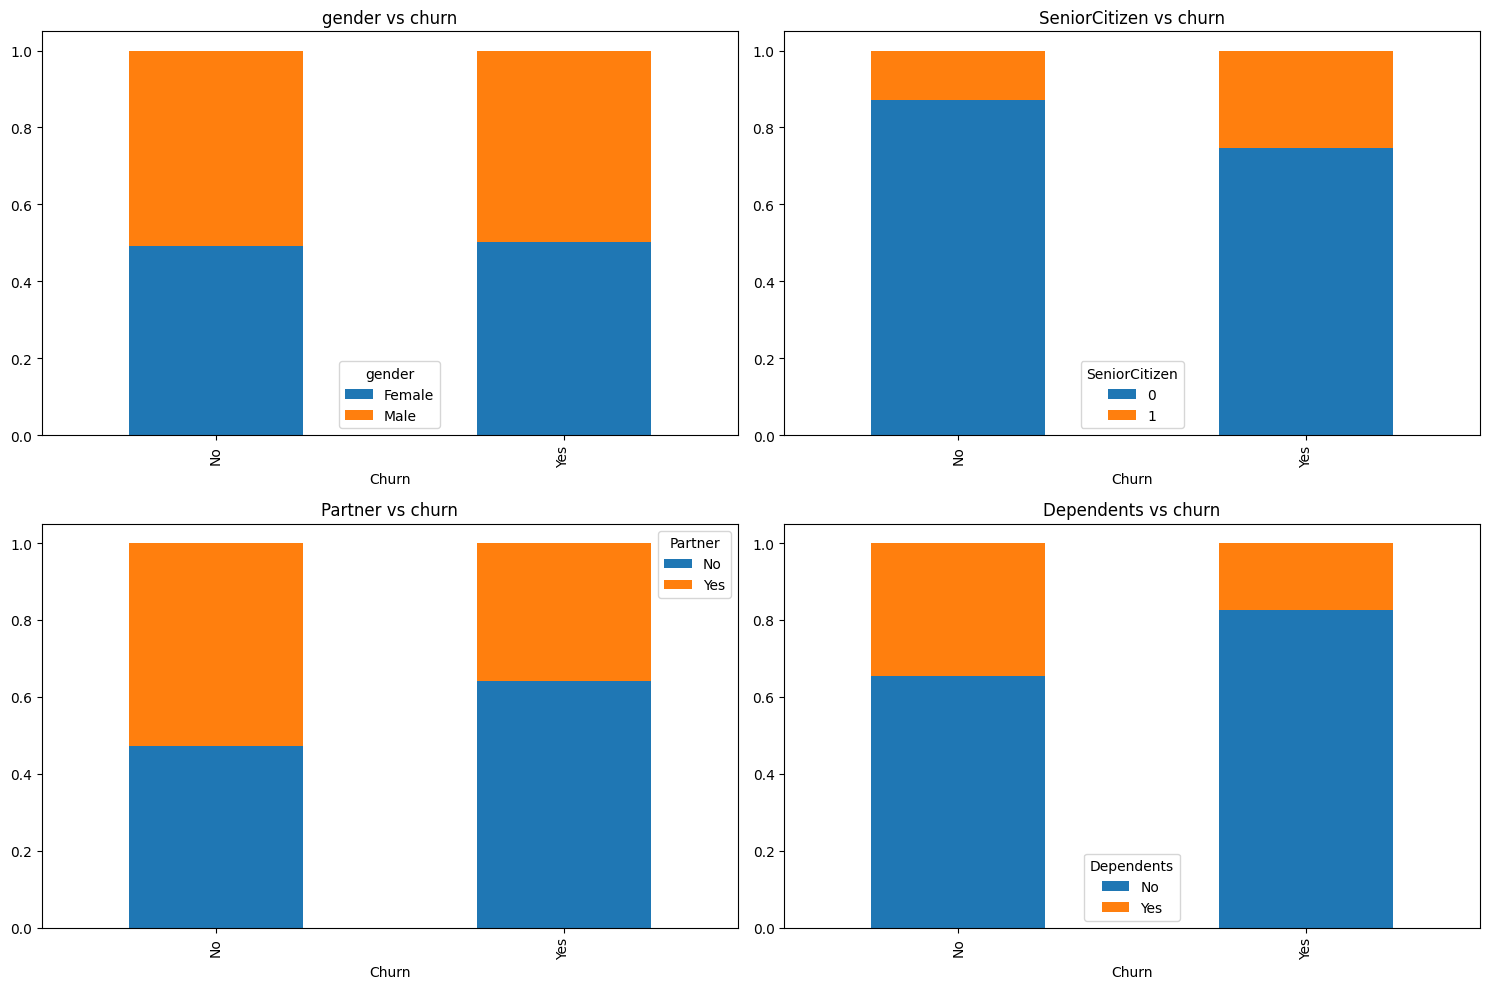

In [237]:
#stacked bar charts to show the relationships between different categorical features (demographics) and churn

demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, demo in enumerate(demographics):
    row, col = i // 2, i % 2
    crosstab = pd.crosstab(df['Churn'], df[demo], normalize = 'index')
    crosstab.plot(kind='bar', stacked= True, ax=axes[row, col], title=f'{demo} vs churn')
plt.tight_layout()
plt.show()

In [238]:
#handling missing values using dropna()
df = df.dropna(subset='TotalCharges')
#checking the number of missing values after dropna()
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

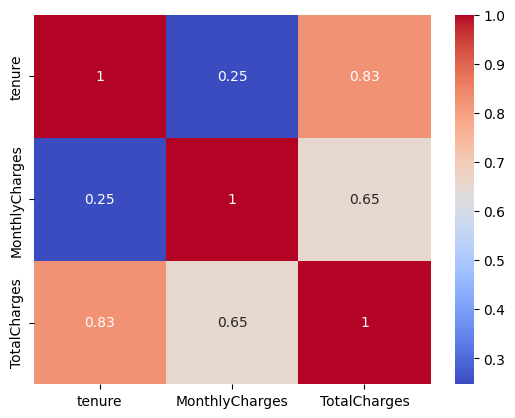

In [239]:
#redoing the numerical value charts for EDA after removing missing values
#heatmap:
correlation = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.show()

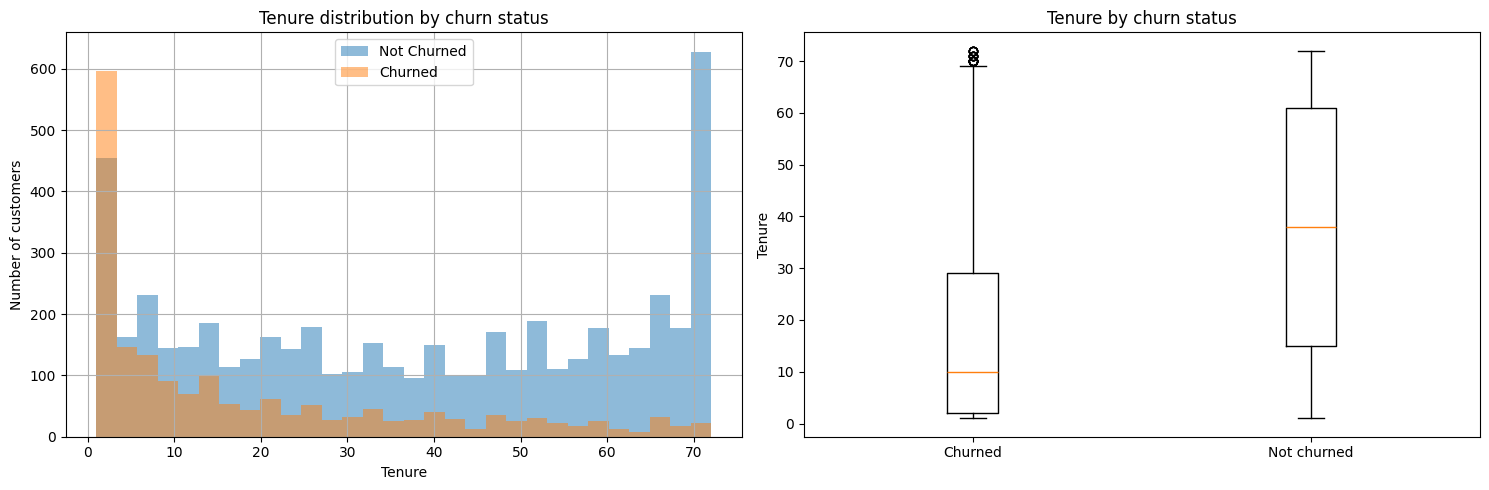

In [240]:
#tenure vs churn histogram & boxplot AFTER dropna()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df[df['Churn'] == 'No']['tenure'].hist(alpha=0.5, label='Not Churned', bins=30, ax=axes[0])
df[df['Churn'] == 'Yes']['tenure'].hist(alpha=0.5, label='Churned', bins=30, ax=axes[0])
axes[0].set_title('Tenure distribution by churn status')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Number of customers')
axes[0].legend()

axes[1].boxplot([
    df[df['Churn']=='Yes']['tenure'], 
    df[df['Churn']=='No']['tenure']
],
tick_labels=['Churned', 'Not churned']
)
axes[1].set_ylabel('Tenure')
axes[1].set_title('Tenure by churn status')
plt.tight_layout()
plt.show()

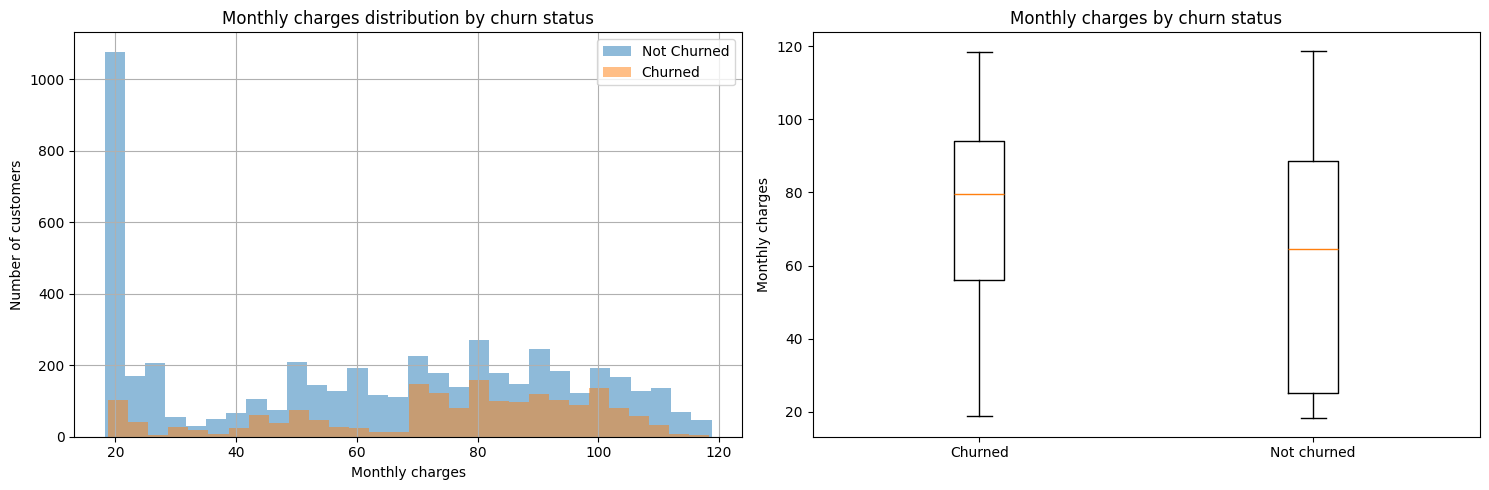

In [241]:
#monthly charges vs churn histogram & boxplot AFTER dropna()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df[df['Churn'] == 'No']['MonthlyCharges'].hist(alpha=0.5, label='Not Churned', bins=30, ax=axes[0])
df[df['Churn'] == 'Yes']['MonthlyCharges'].hist(alpha=0.5, label='Churned', bins=30, ax=axes[0])
axes[0].set_title('Monthly charges distribution by churn status')
axes[0].set_xlabel('Monthly charges')
axes[0].set_ylabel('Number of customers')
axes[0].legend()

axes[1].boxplot([
    df[df['Churn']=='Yes']['MonthlyCharges'], 
    df[df['Churn']=='No']['MonthlyCharges']
],
tick_labels=['Churned', 'Not churned']
)
axes[1].set_ylabel('Monthly charges')
axes[1].set_title('Monthly charges by churn status')
plt.tight_layout()
plt.show()

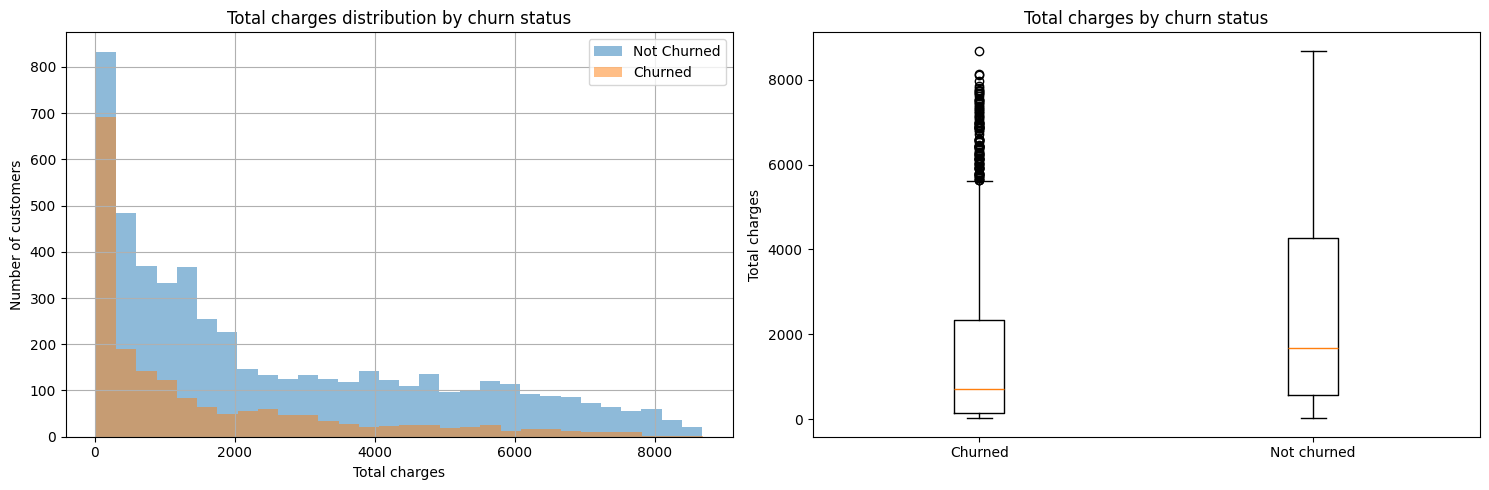

In [242]:
#total charges vs churn histogram & boxplot AFTER dropna()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df[df['Churn'] == 'No']['TotalCharges'].hist(alpha=0.5, label='Not Churned', bins=30, ax=axes[0])
df[df['Churn'] == 'Yes']['TotalCharges'].hist(alpha=0.5, label='Churned', bins=30, ax=axes[0])
axes[0].set_title('Total charges distribution by churn status')
axes[0].set_xlabel('Total charges')
axes[0].set_ylabel('Number of customers')
axes[0].legend()

#boxplots
axes[1].boxplot([
    df[df['Churn']=='Yes']['TotalCharges'], 
    df[df['Churn']=='No']['TotalCharges']
],
tick_labels=['Churned', 'Not churned']
)
axes[1].set_ylabel('Total charges')
axes[1].set_title('Total charges by churn status')
plt.tight_layout()
plt.show()

In [243]:
#  Convert categorical features into numerical representations 

# Drop customerID column as it is not useful for prediction
df = df.drop('customerID', axis=1)

#  Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Use Label Encoding 
df_encoded = df.copy()
le = LabelEncoder()

for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


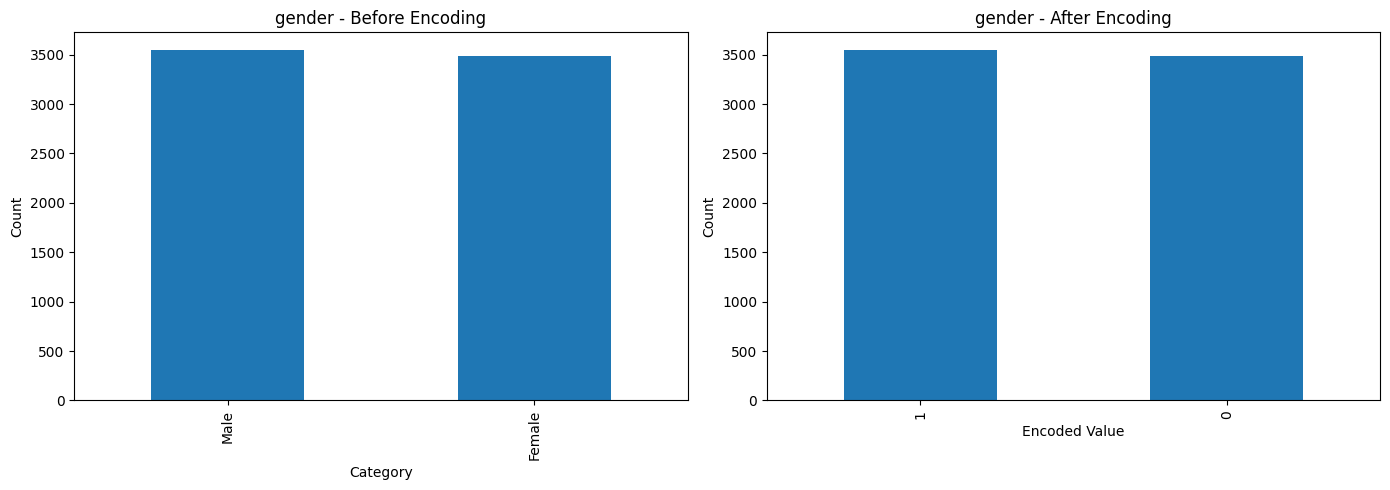

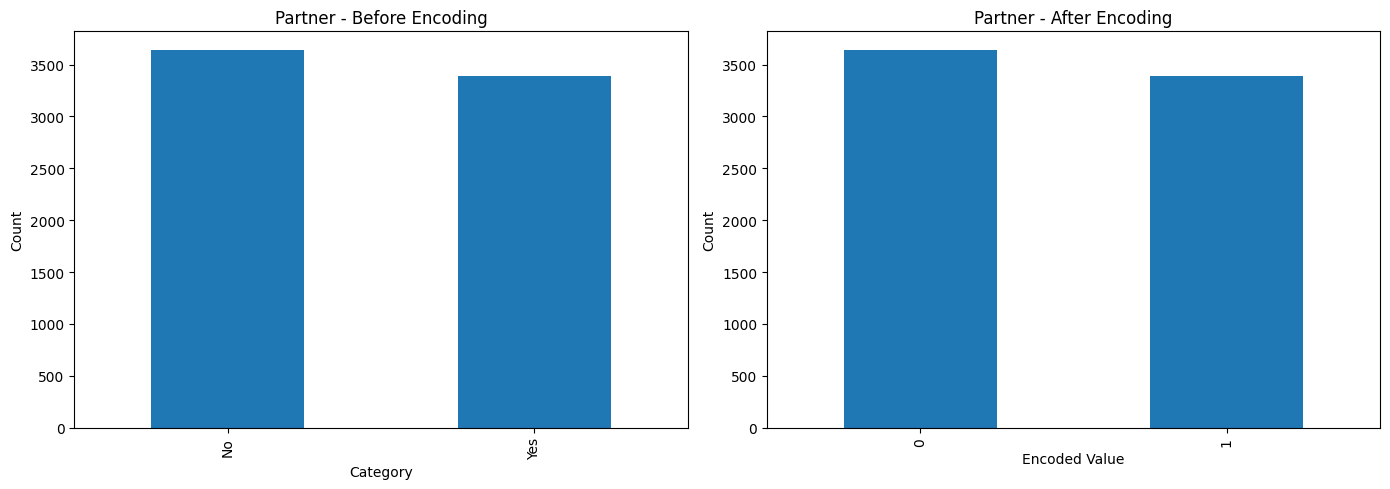

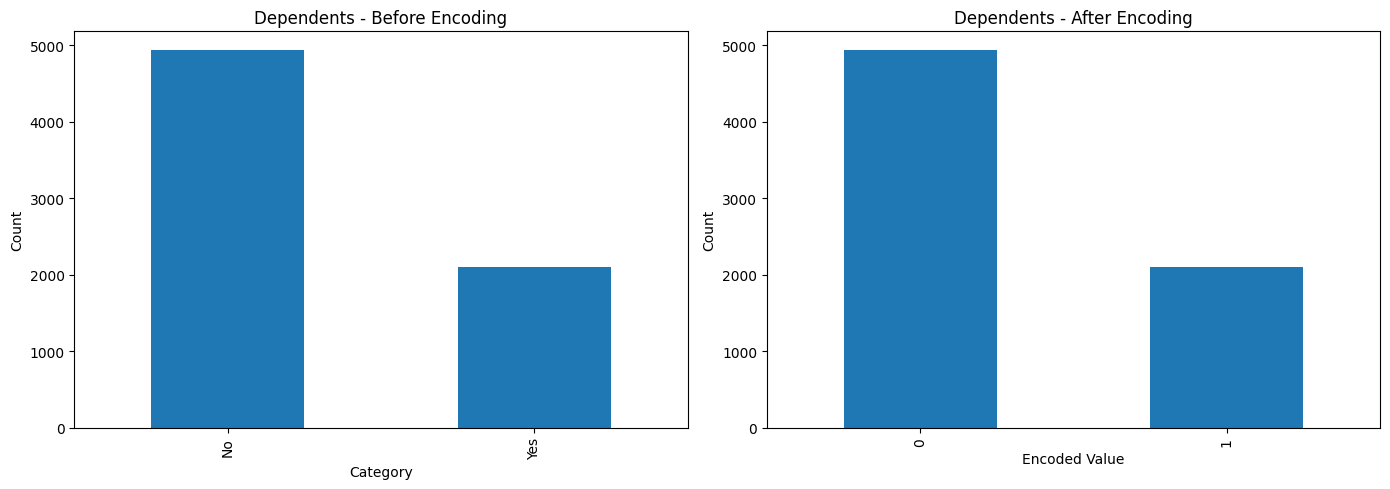

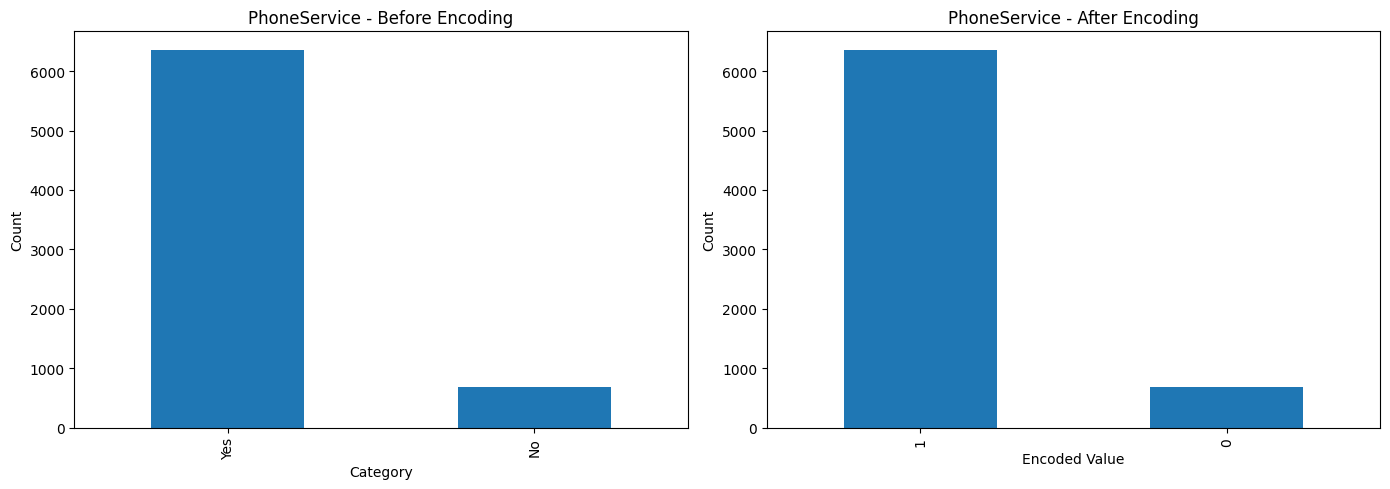

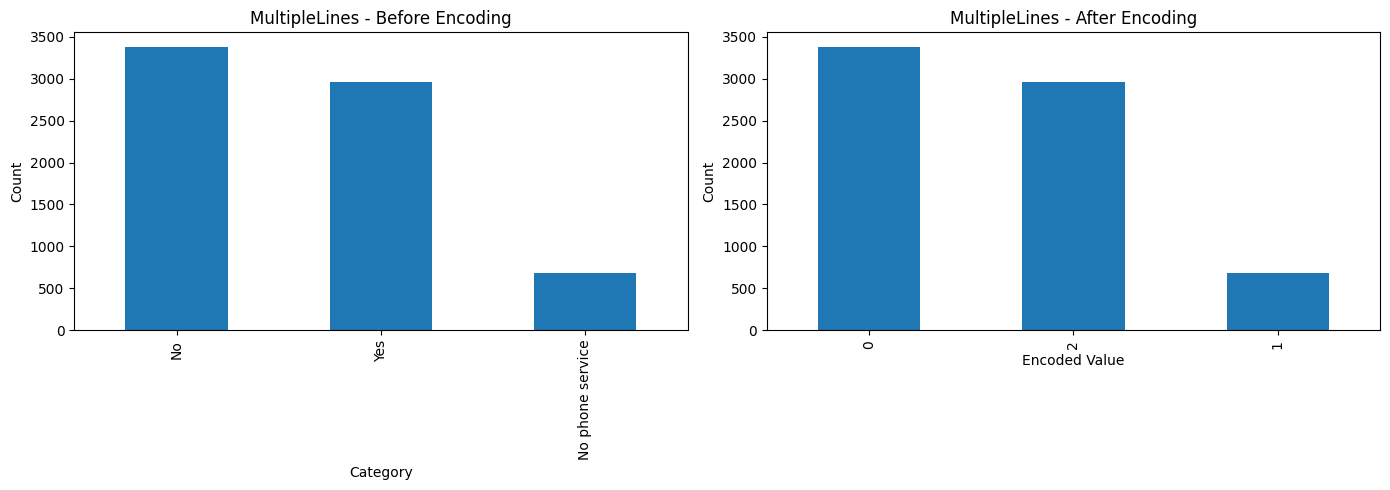

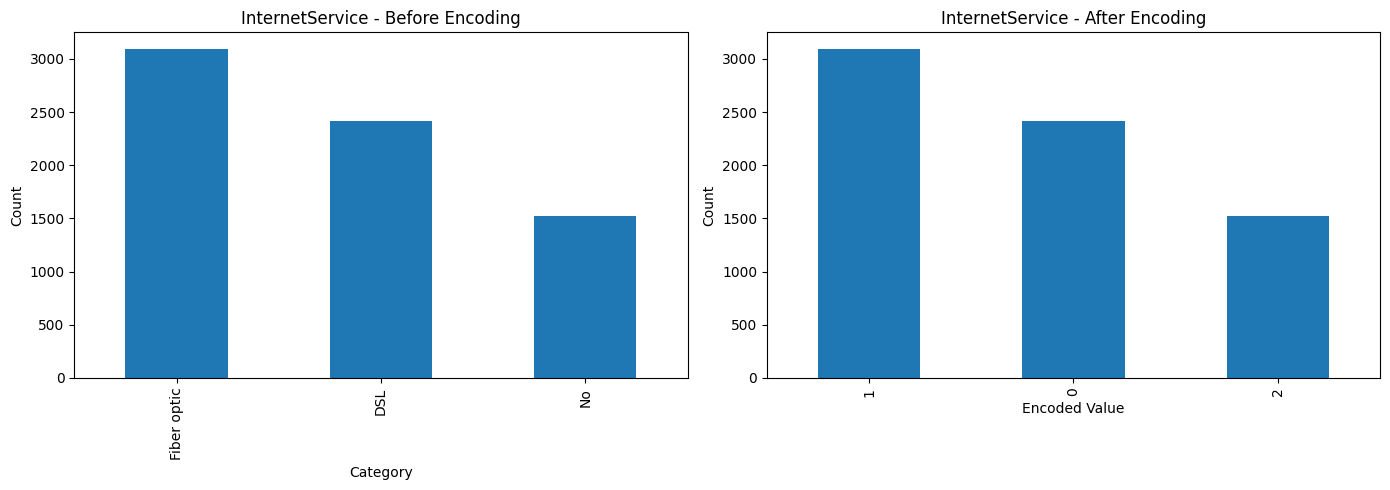

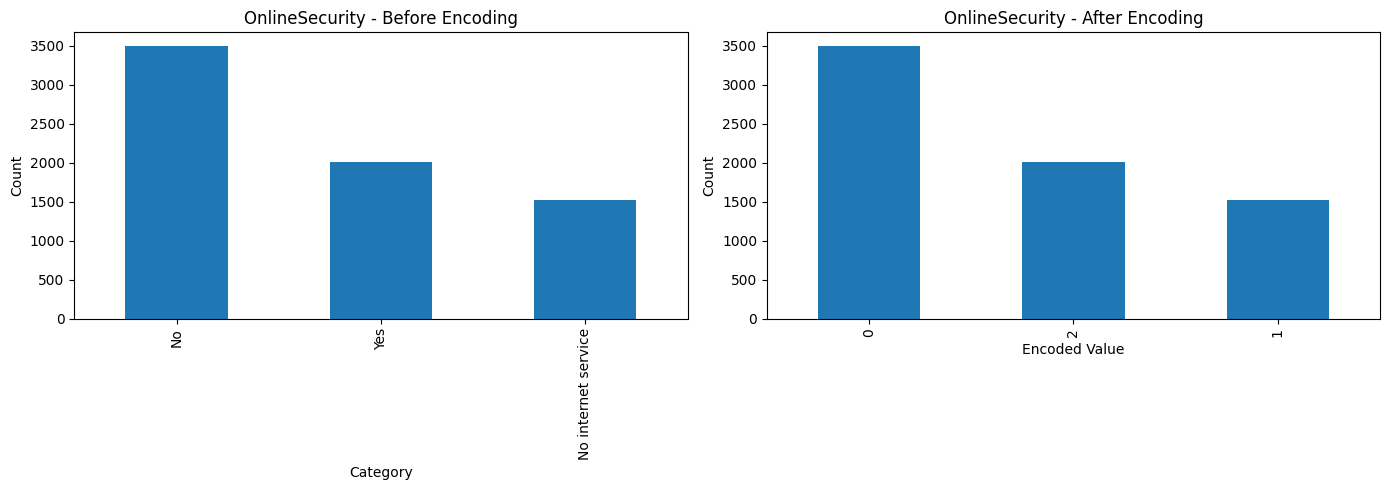

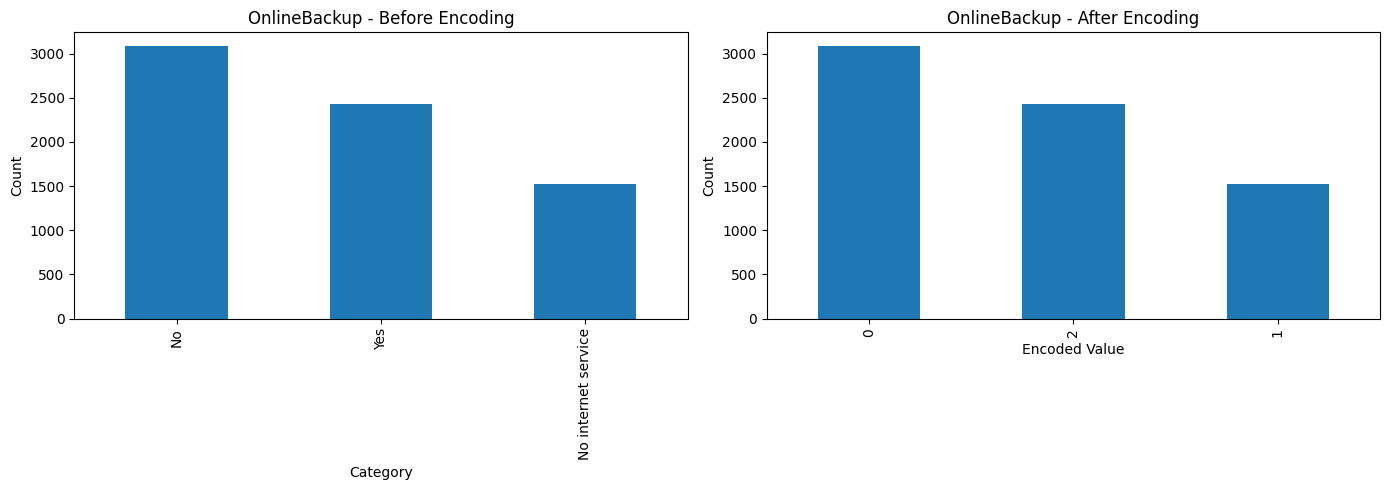

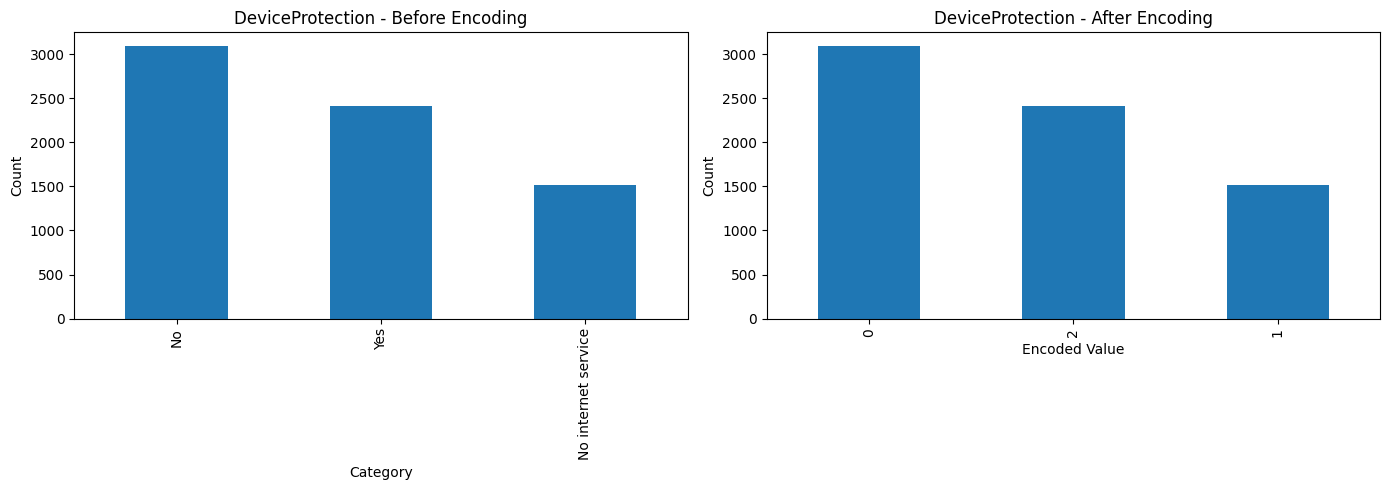

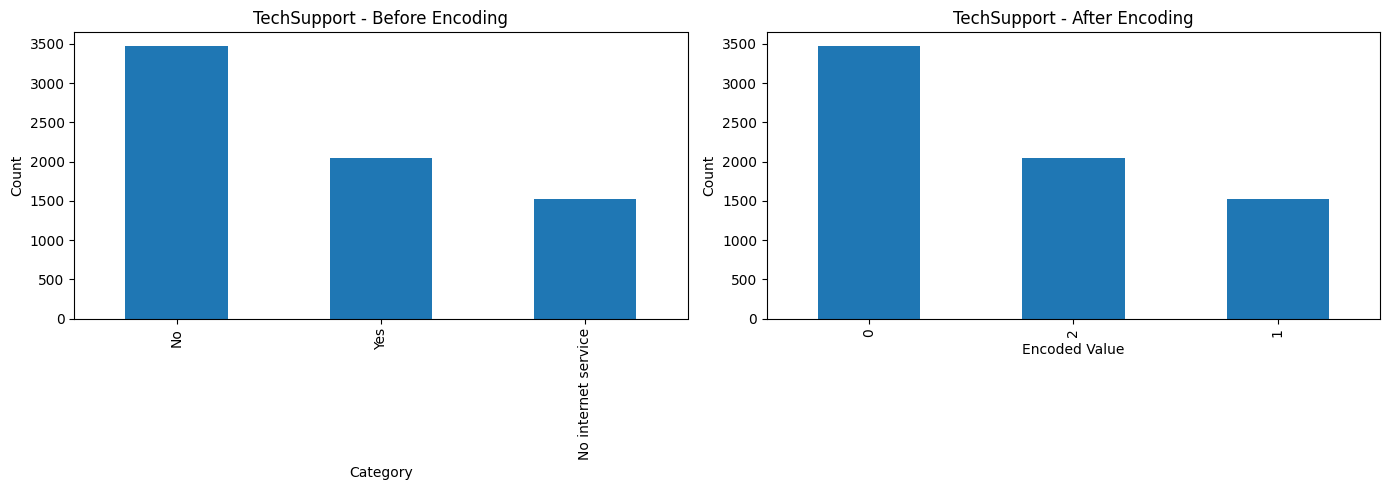

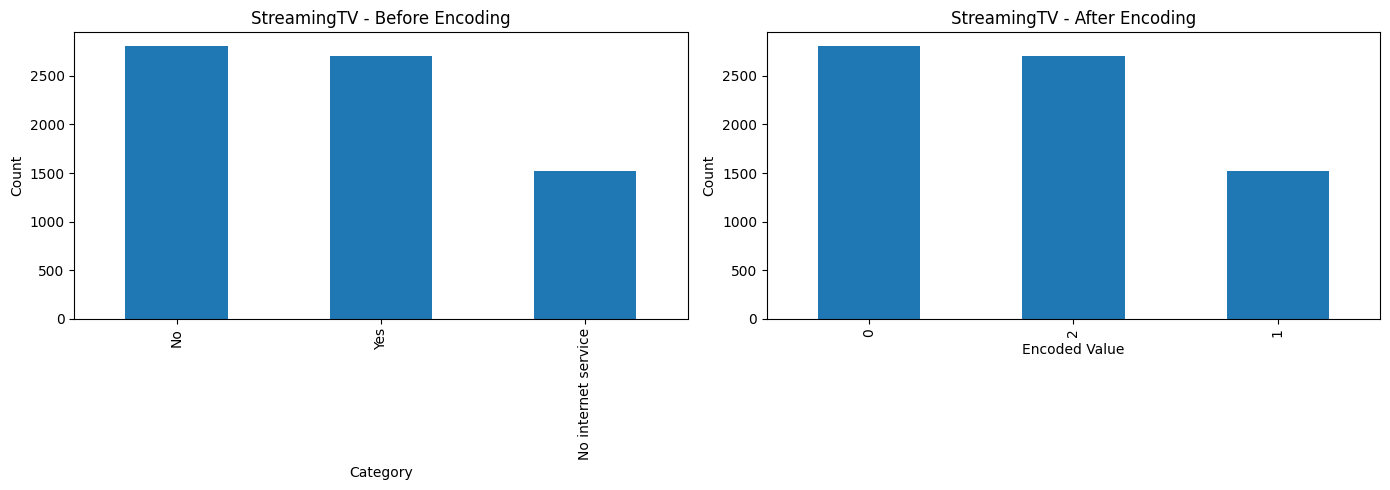

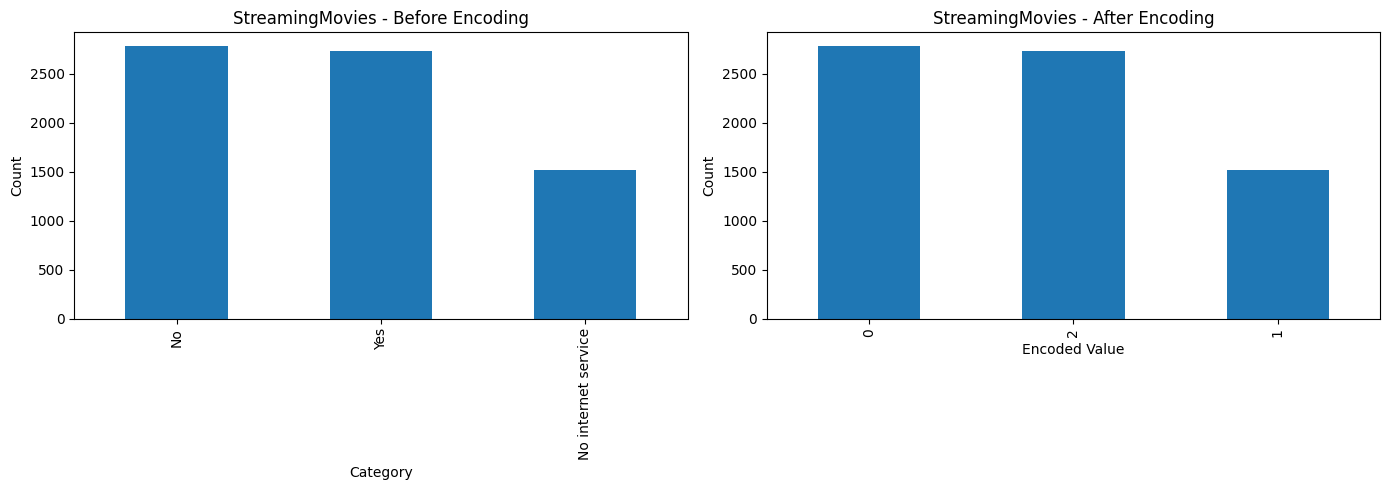

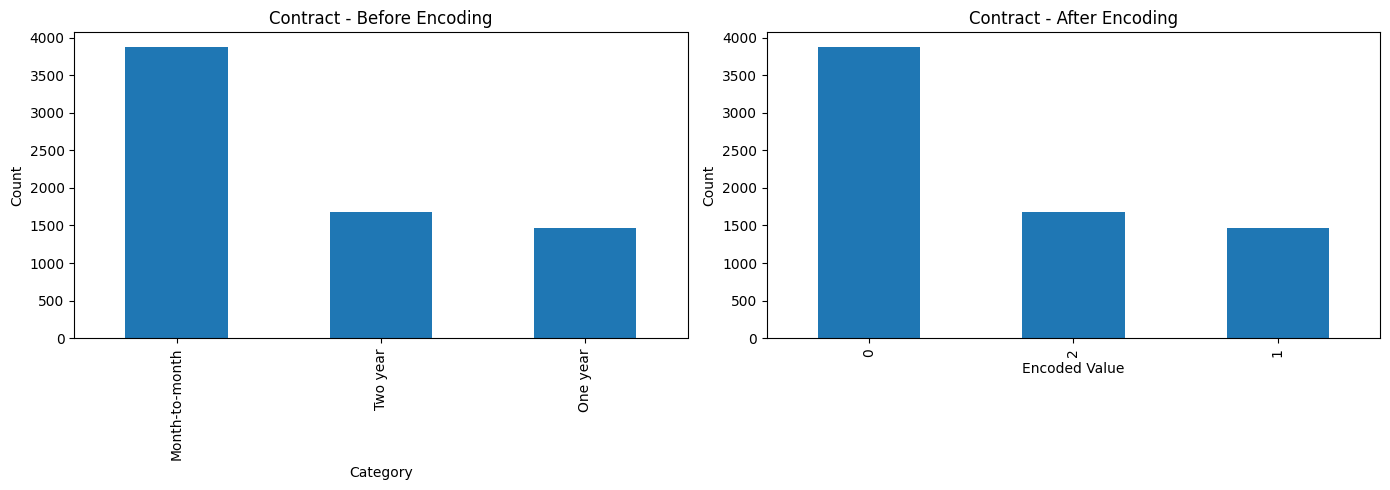

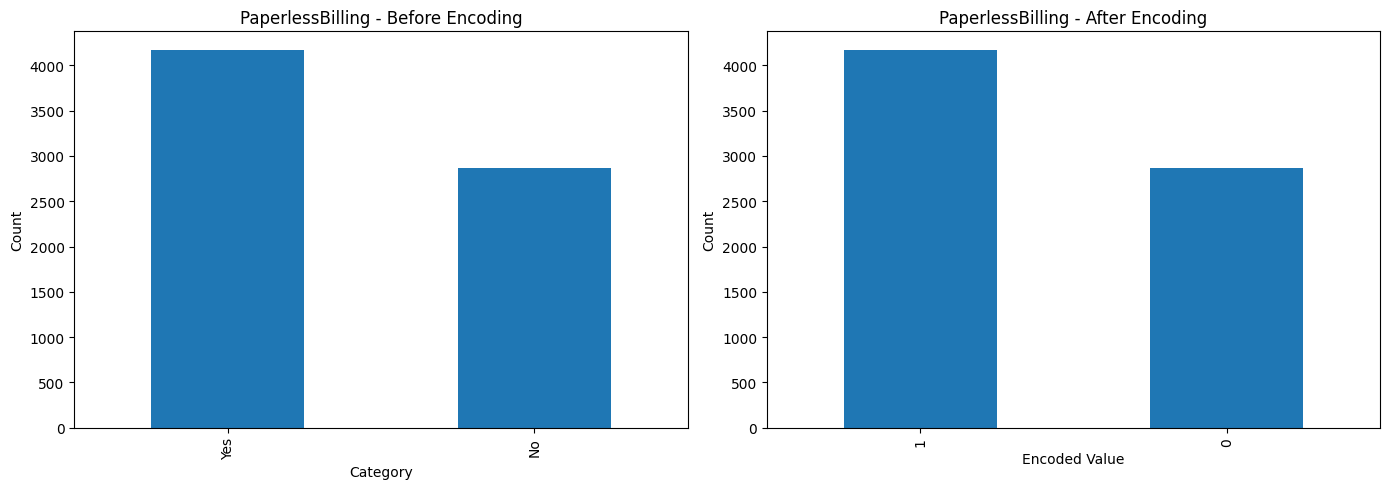

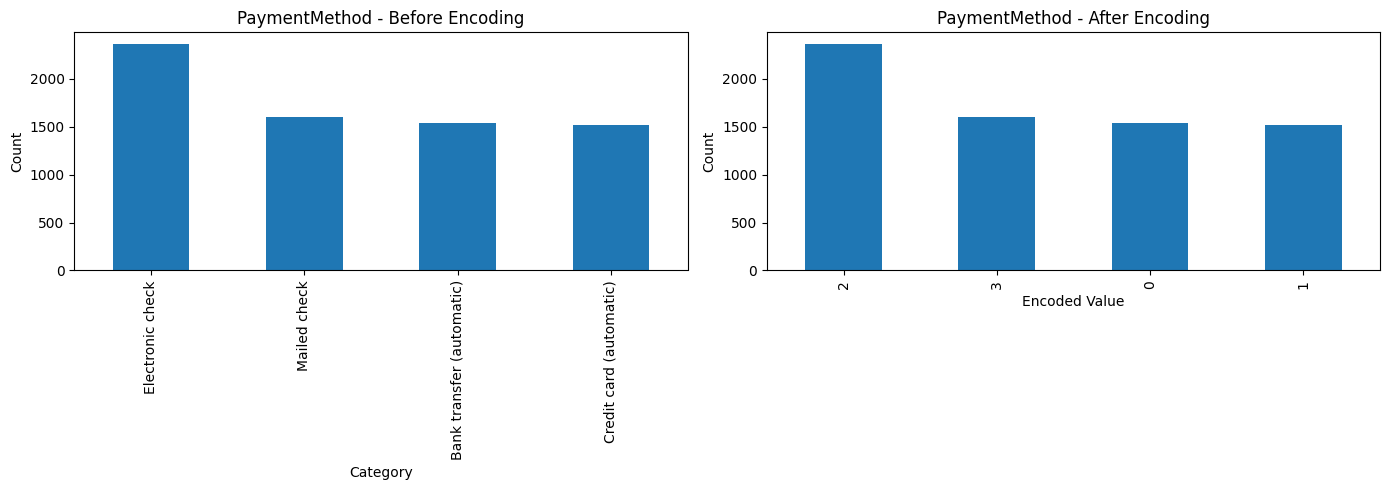

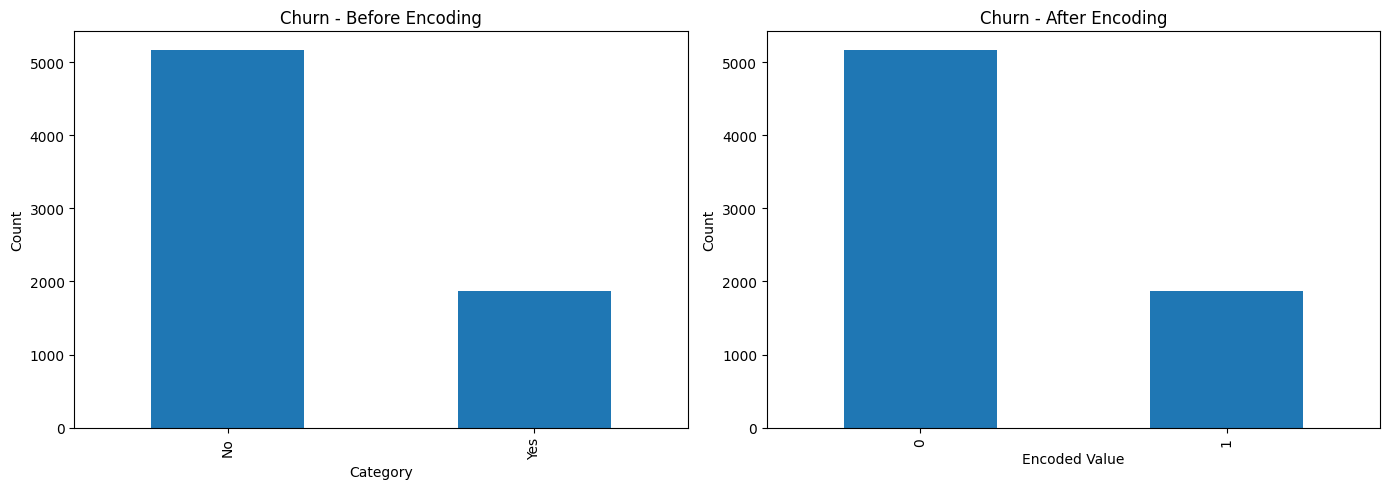

In [244]:
# Graphs Before & After for all converted columns

for col in cat_cols:
    plt.figure(figsize=(14, 5))
   
    # Before
    plt.subplot(1, 2, 1)
    df[col].value_counts().plot(kind="bar")
    plt.title(f"{col} - Before Encoding")
    plt.xlabel("Category")
    plt.ylabel("Count")
    
    # After
    plt.subplot(1, 2, 2)
    df_encoded[col].value_counts().plot(kind="bar")
    plt.title(f"{col} - After Encoding")
    plt.xlabel("Encoded Value")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [245]:
# Scaling

# Select continuous numeric columns (do NOT scale binaries)
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create final_df as a copy
final_df = df_encoded.copy()

# Scale only continuous features
scaler = StandardScaler()
final_df[num_cols] = scaler.fit_transform(df[num_cols])

final_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


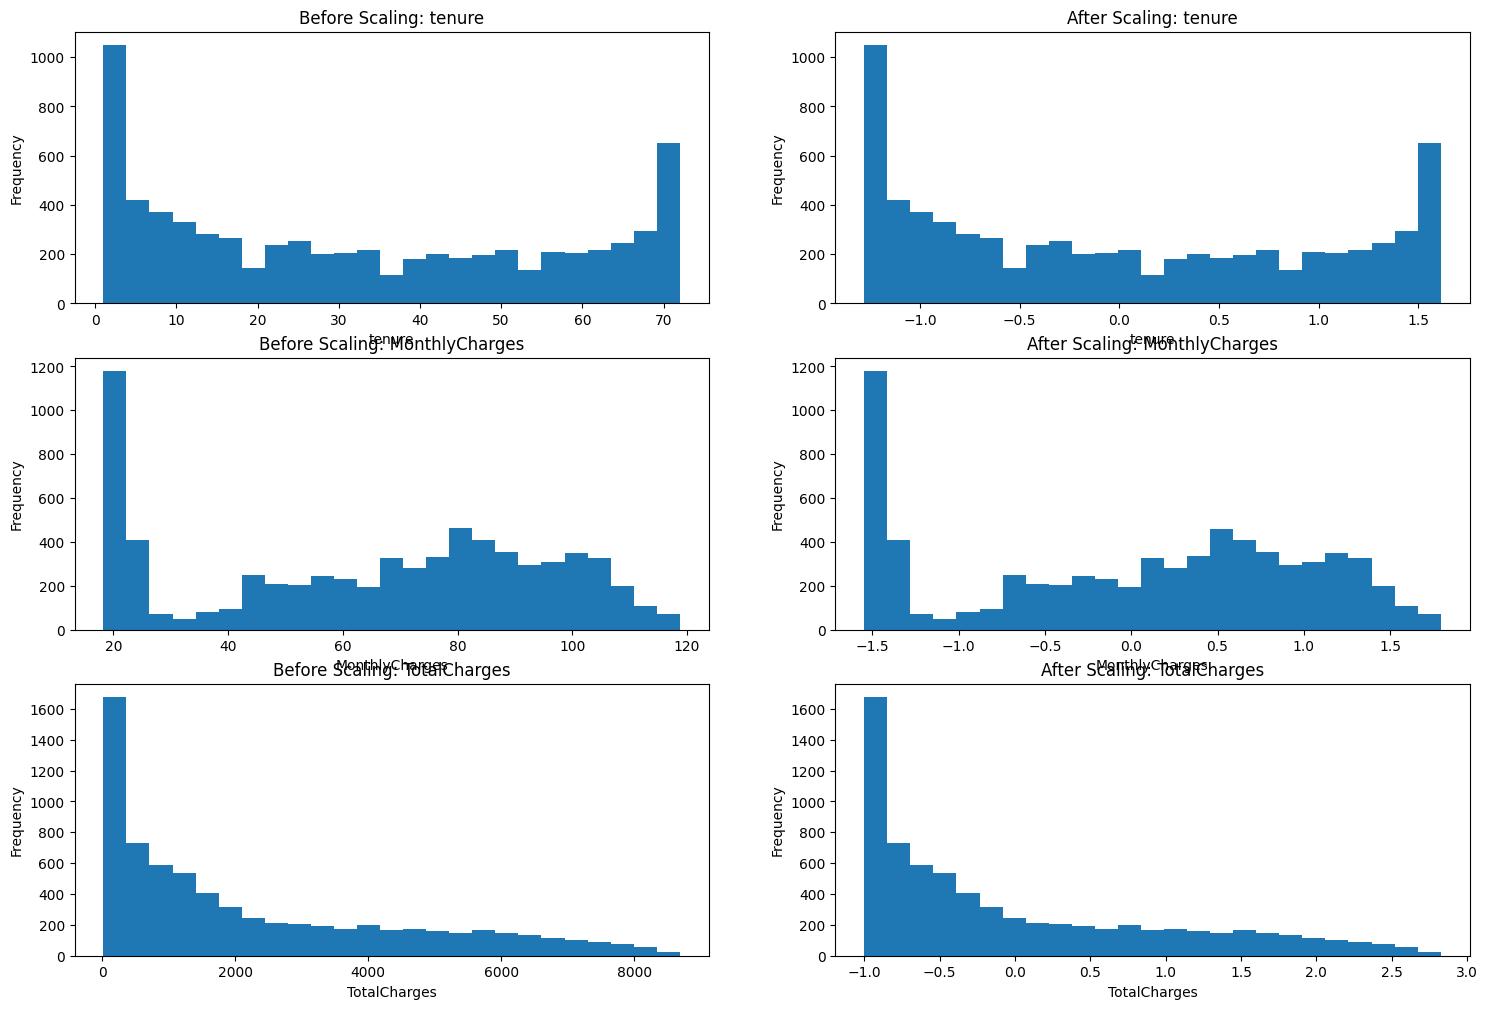

In [246]:
# Before vs After Scaling 
plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, 2*i - 1)
    plt.hist(df[col].dropna(), bins=25)
    plt.title(f"Before Scaling: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.subplot(len(num_cols), 2, 2*i)
    plt.hist(final_df[col].dropna(), bins=25)
    plt.title(f"After Scaling: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.show()

In [247]:
# Split the dataset into training and testing sets 

# Features and Target
X = final_df.drop("Churn", axis=1)
y = final_df["Churn"]

# Train–test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Convert to numpy arrays for model training
X_train_scaled = X_train.values
X_test_scaled = X_test.values

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4922, 19), (2110, 19), (4922,), (2110,))

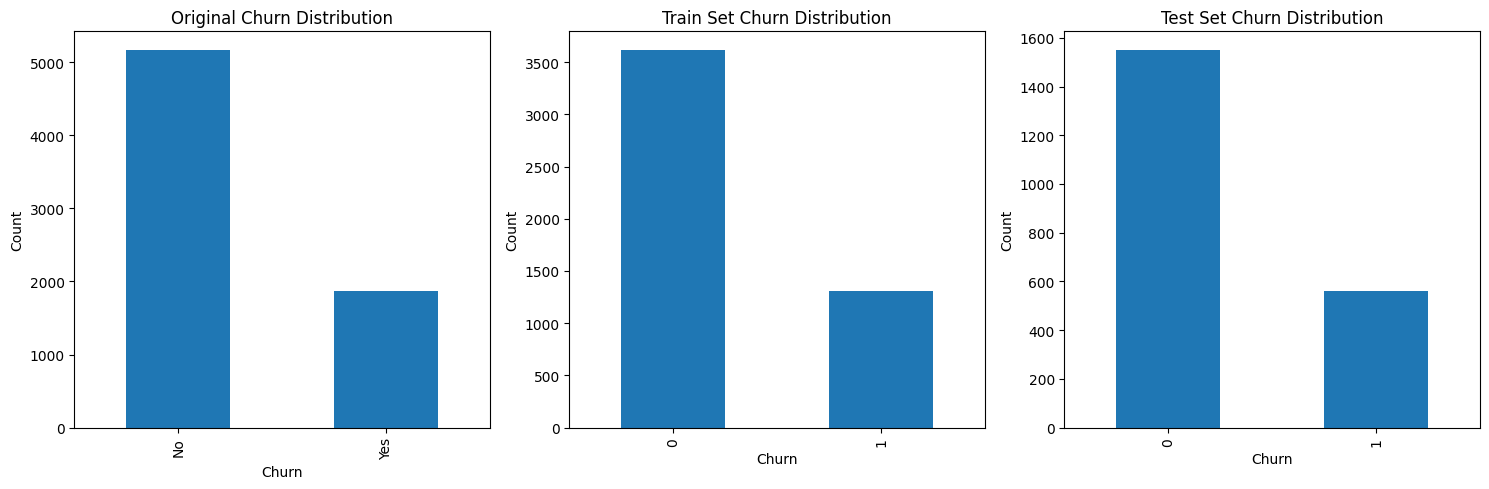

In [248]:
# Stratification Check
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df["Churn"].value_counts().plot(kind="bar")
plt.title("Original Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
y_train.value_counts().plot(kind="bar")
plt.title("Train Set Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
y_test.value_counts().plot(kind="bar")
plt.title("Test Set Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

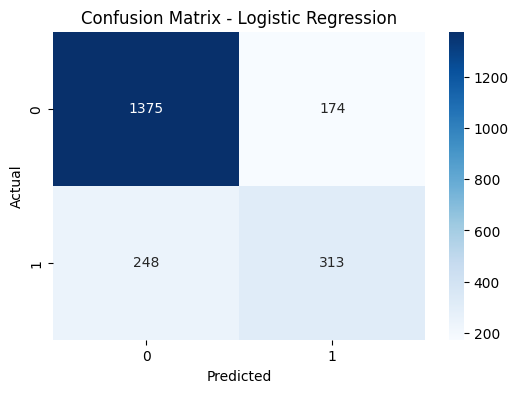

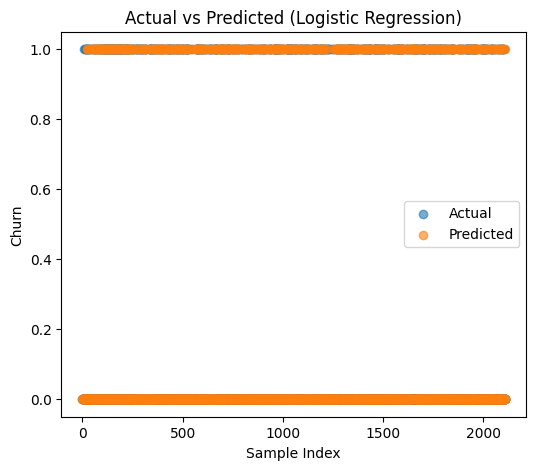

In [249]:
# 2.3 Model Building and Training

# Logistic Regression Classifier Model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_model.predict(X_test_scaled)

# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Scatter Plot 
plt.figure(figsize=(6,5))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.6)
plt.legend()
plt.title("Actual vs Predicted (Logistic Regression)")
plt.xlabel("Sample Index")
plt.ylabel("Churn")
plt.show()

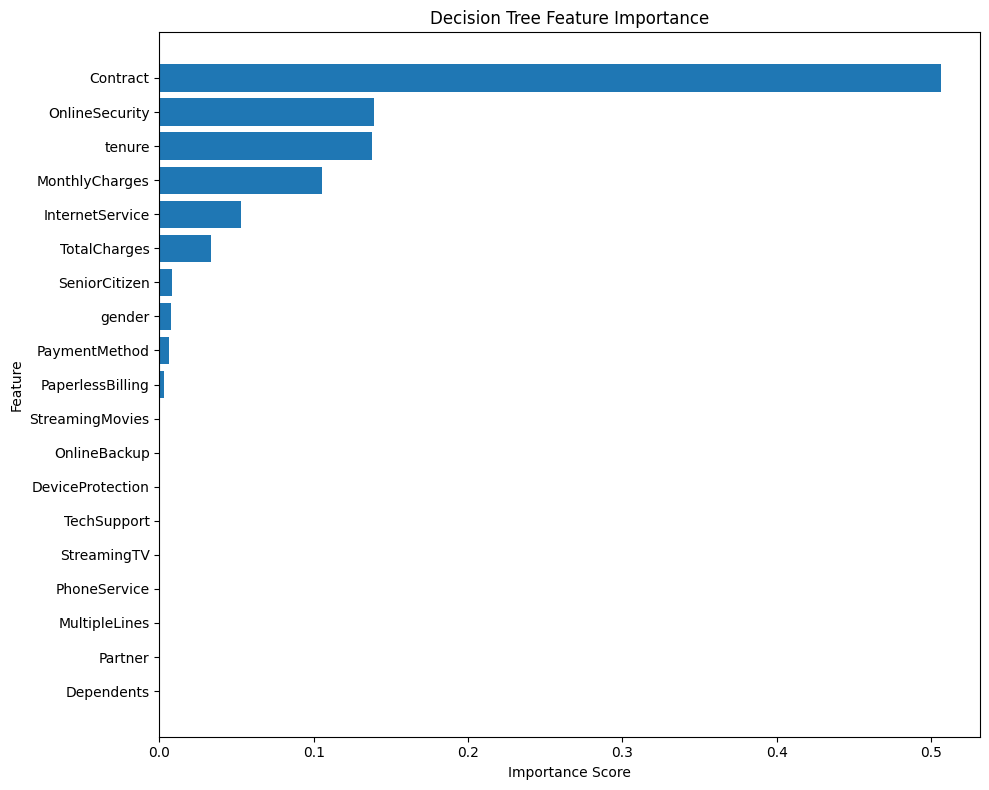

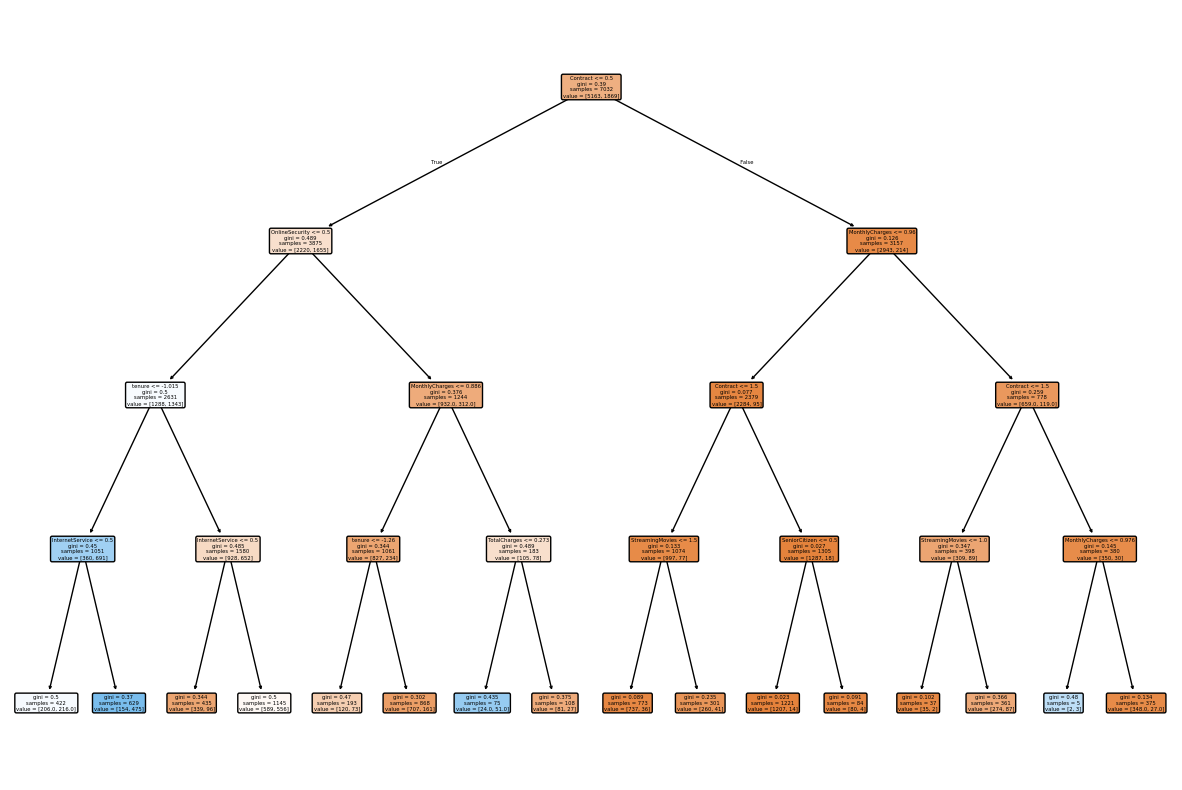

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# Decision Tree Classifier Model
dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Decision Tree Feature Importance Plot
# Extract feature importances
importances = dt_model.feature_importances_
feature_names = X.columns  # original feature names

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.gca().invert_yaxis()  # most important at the top
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Decision Tree Visualization Function
def quick_decision_tree(df, target_col):
    
    # Prepare features (all columns except target)
    feature_cols = [col for col in df.columns if col != target_col]
    
    X = df[feature_cols]
    y = df[target_col]
    
    # Handle categorical data
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)
    
    # Build tree
    model = DecisionTreeClassifier(max_depth=4, random_state=42)
    model.fit(X, y)
    
    # Plot
    plt.figure(figsize=(15, 10))
    plot_tree(model, feature_names=feature_cols, filled=True, rounded=True)
    plt.show()
    
    return model

quick_decision_tree(final_df, 'Churn')


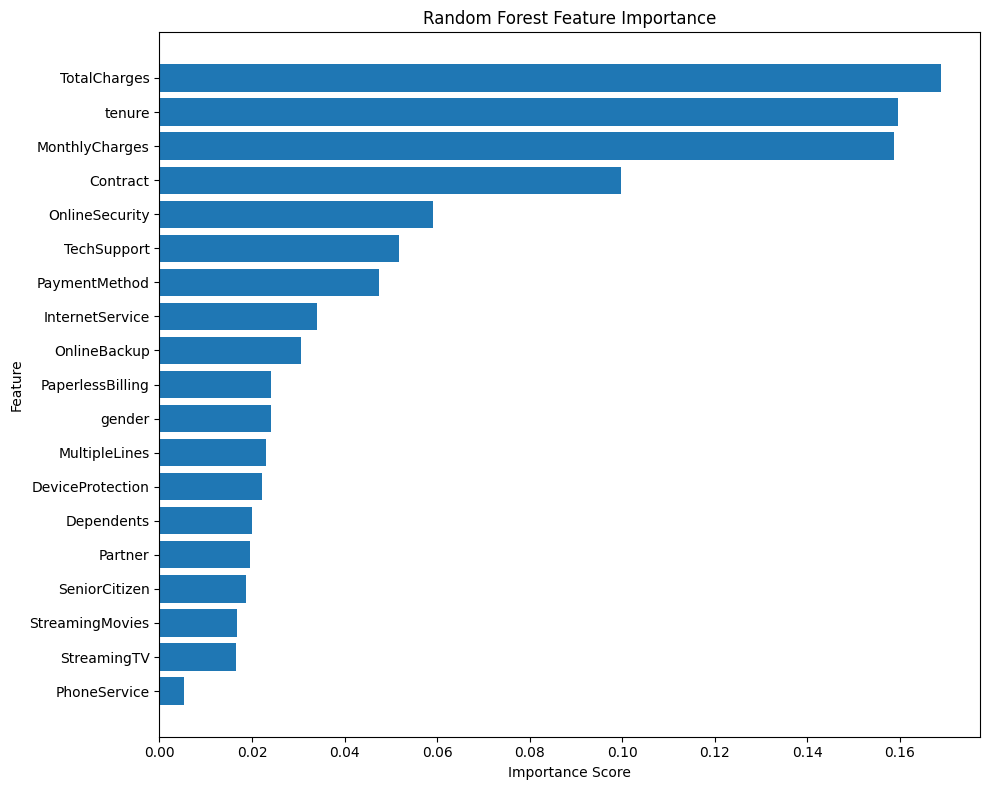

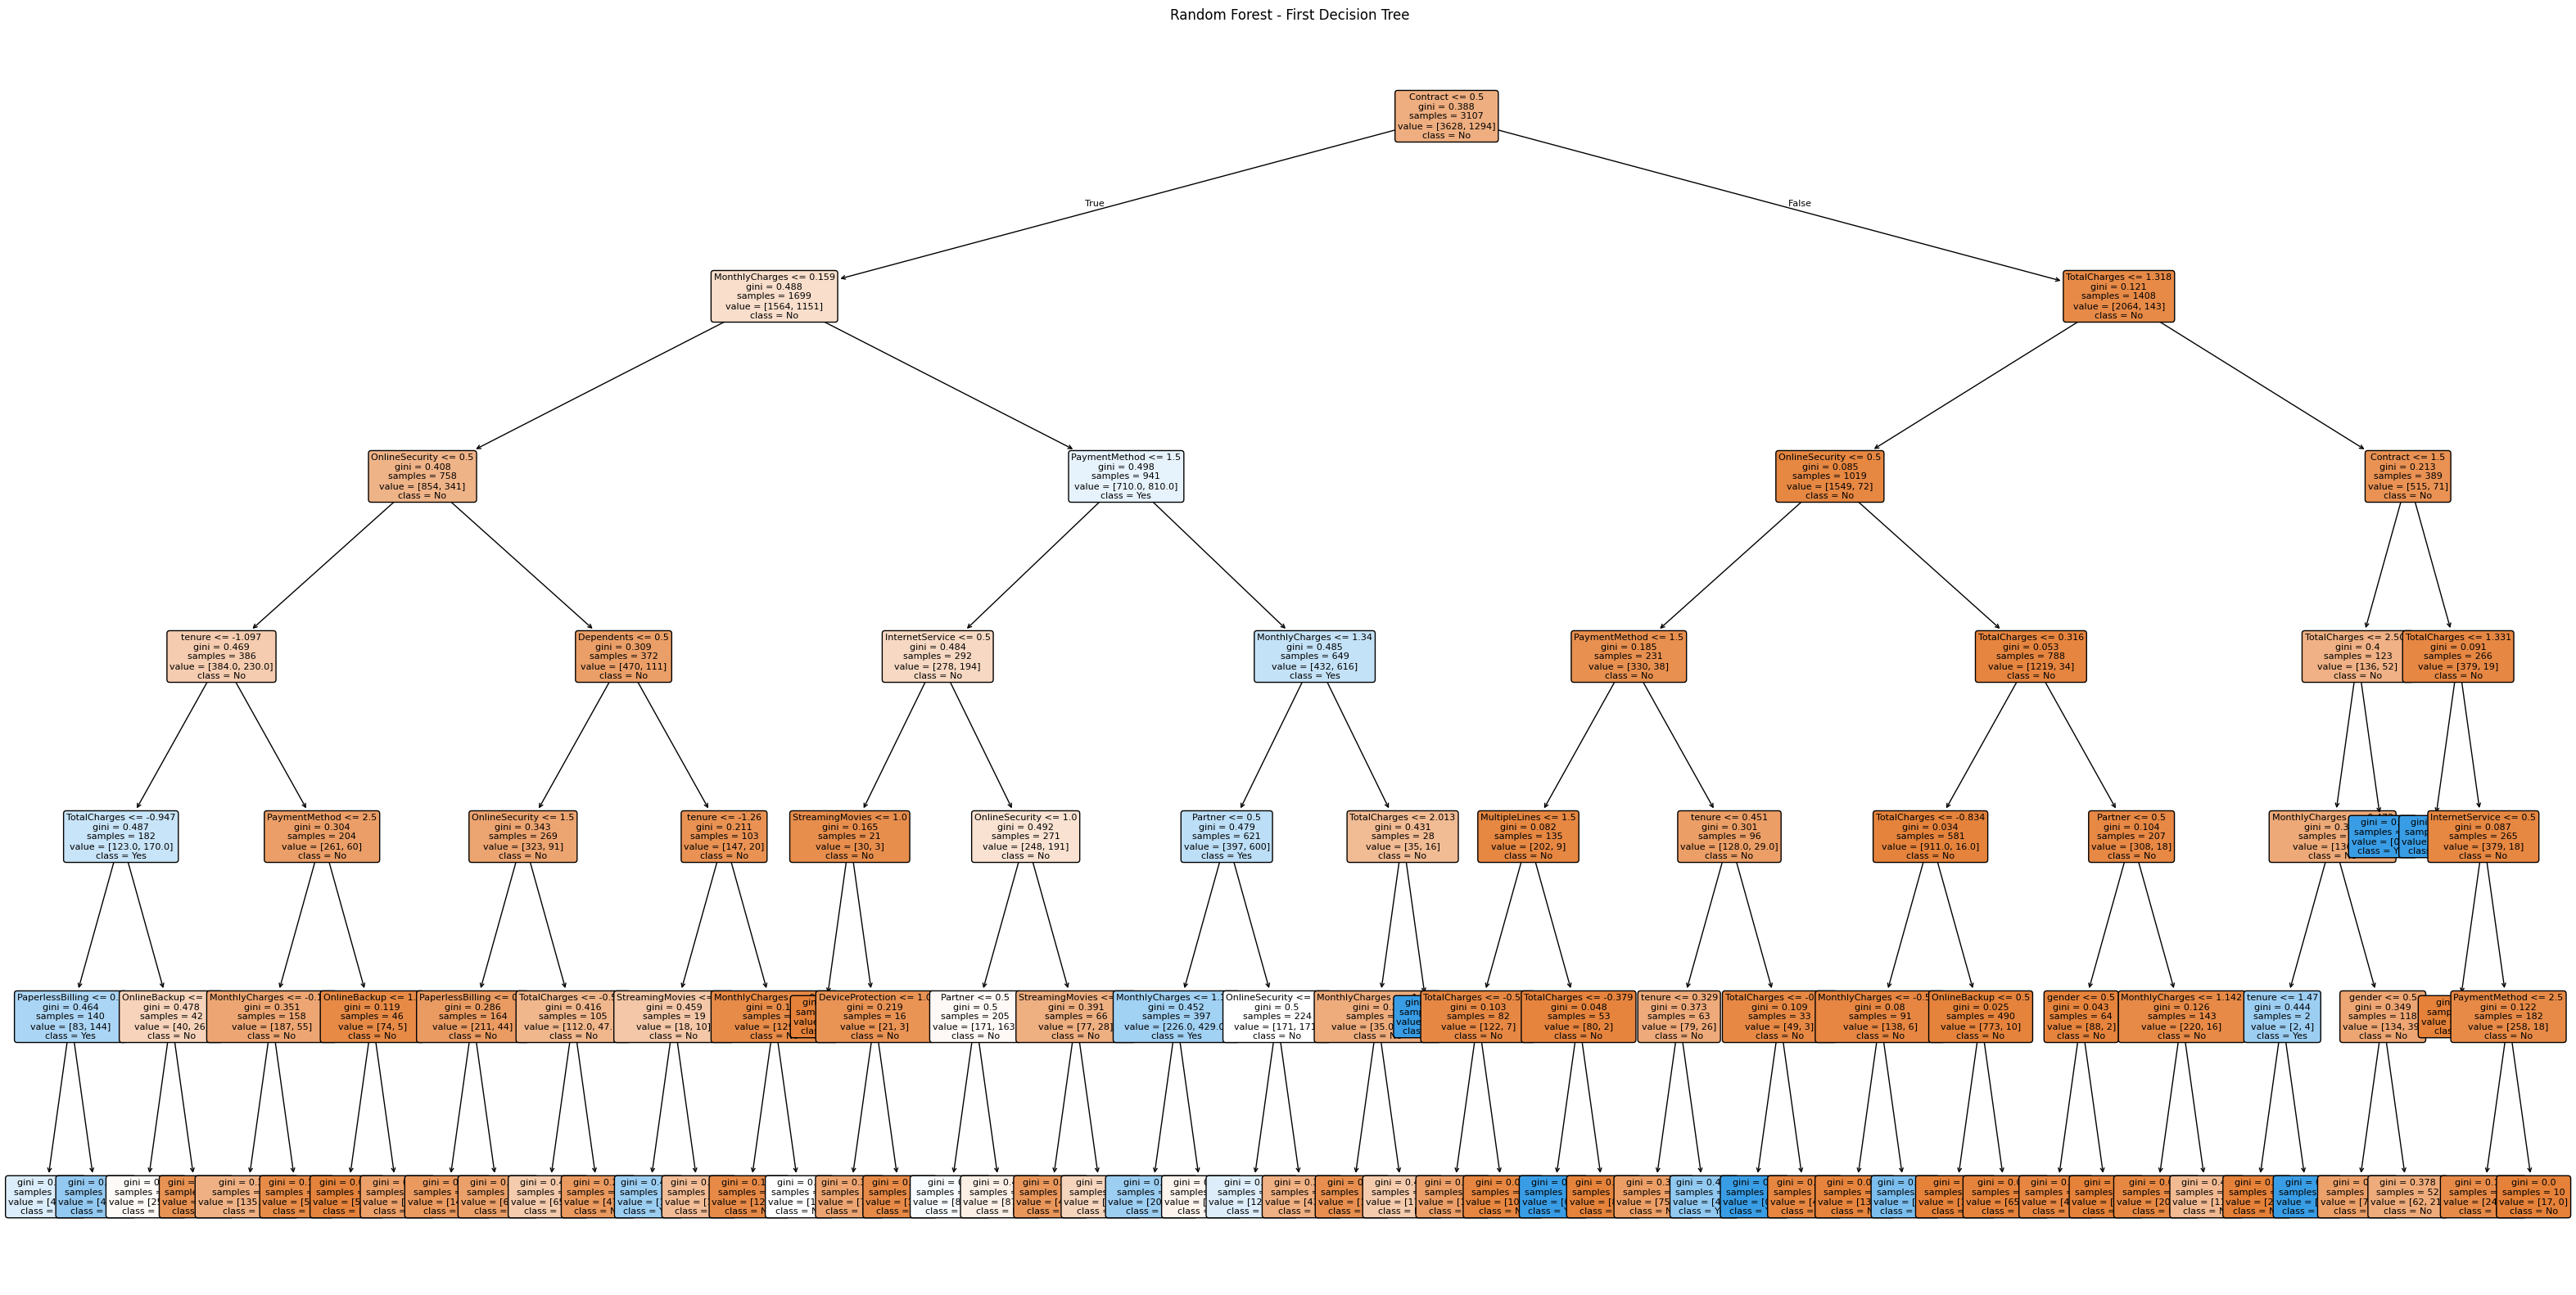

In [261]:
# Random Forest Classifier Model
rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Random Forest Feature Importance Plot
# Extract feature importances from *random forest* (correct)
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.gca().invert_yaxis()  # most important at the top
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=6  # keep the tree readable
)
rf.fit(X_train_scaled, y_train)

# Select the first tree in the forest
estimator = rf.estimators_[0]

# Plot the tree 
plt.figure(figsize=(40, 20))
plot_tree(
    estimator,
    feature_names=X_train.columns,     # your original feature names
    class_names=["No", "Yes"],         # adjust based on your labels
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Random Forest - First Decision Tree")
plt.show()

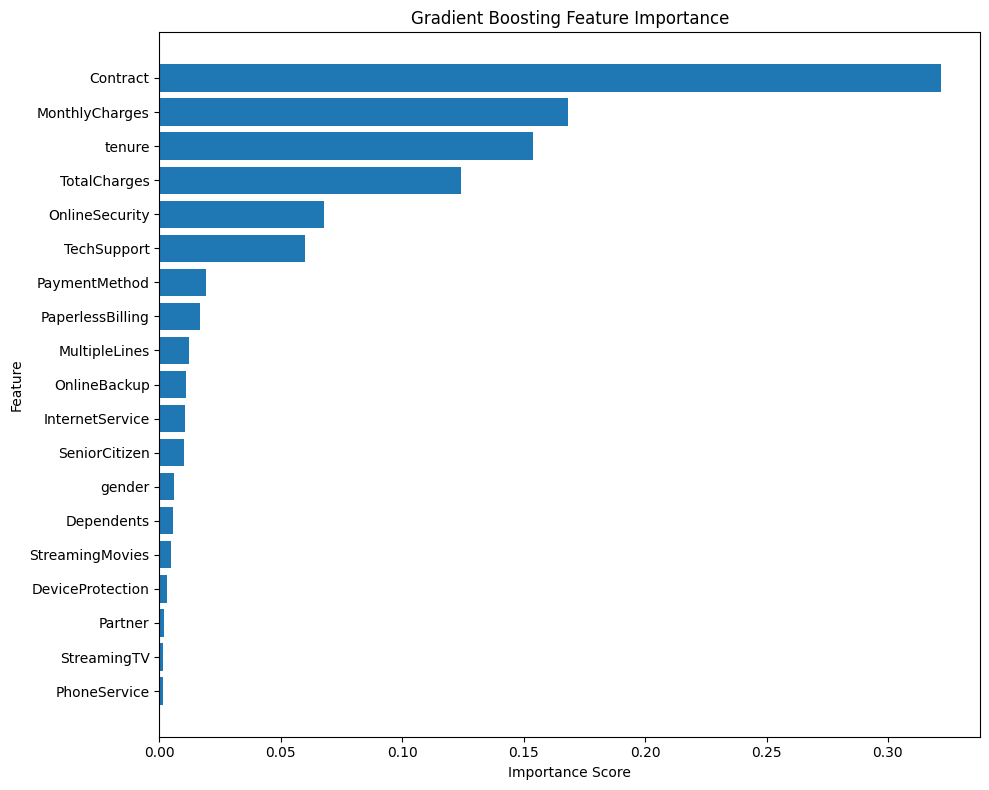

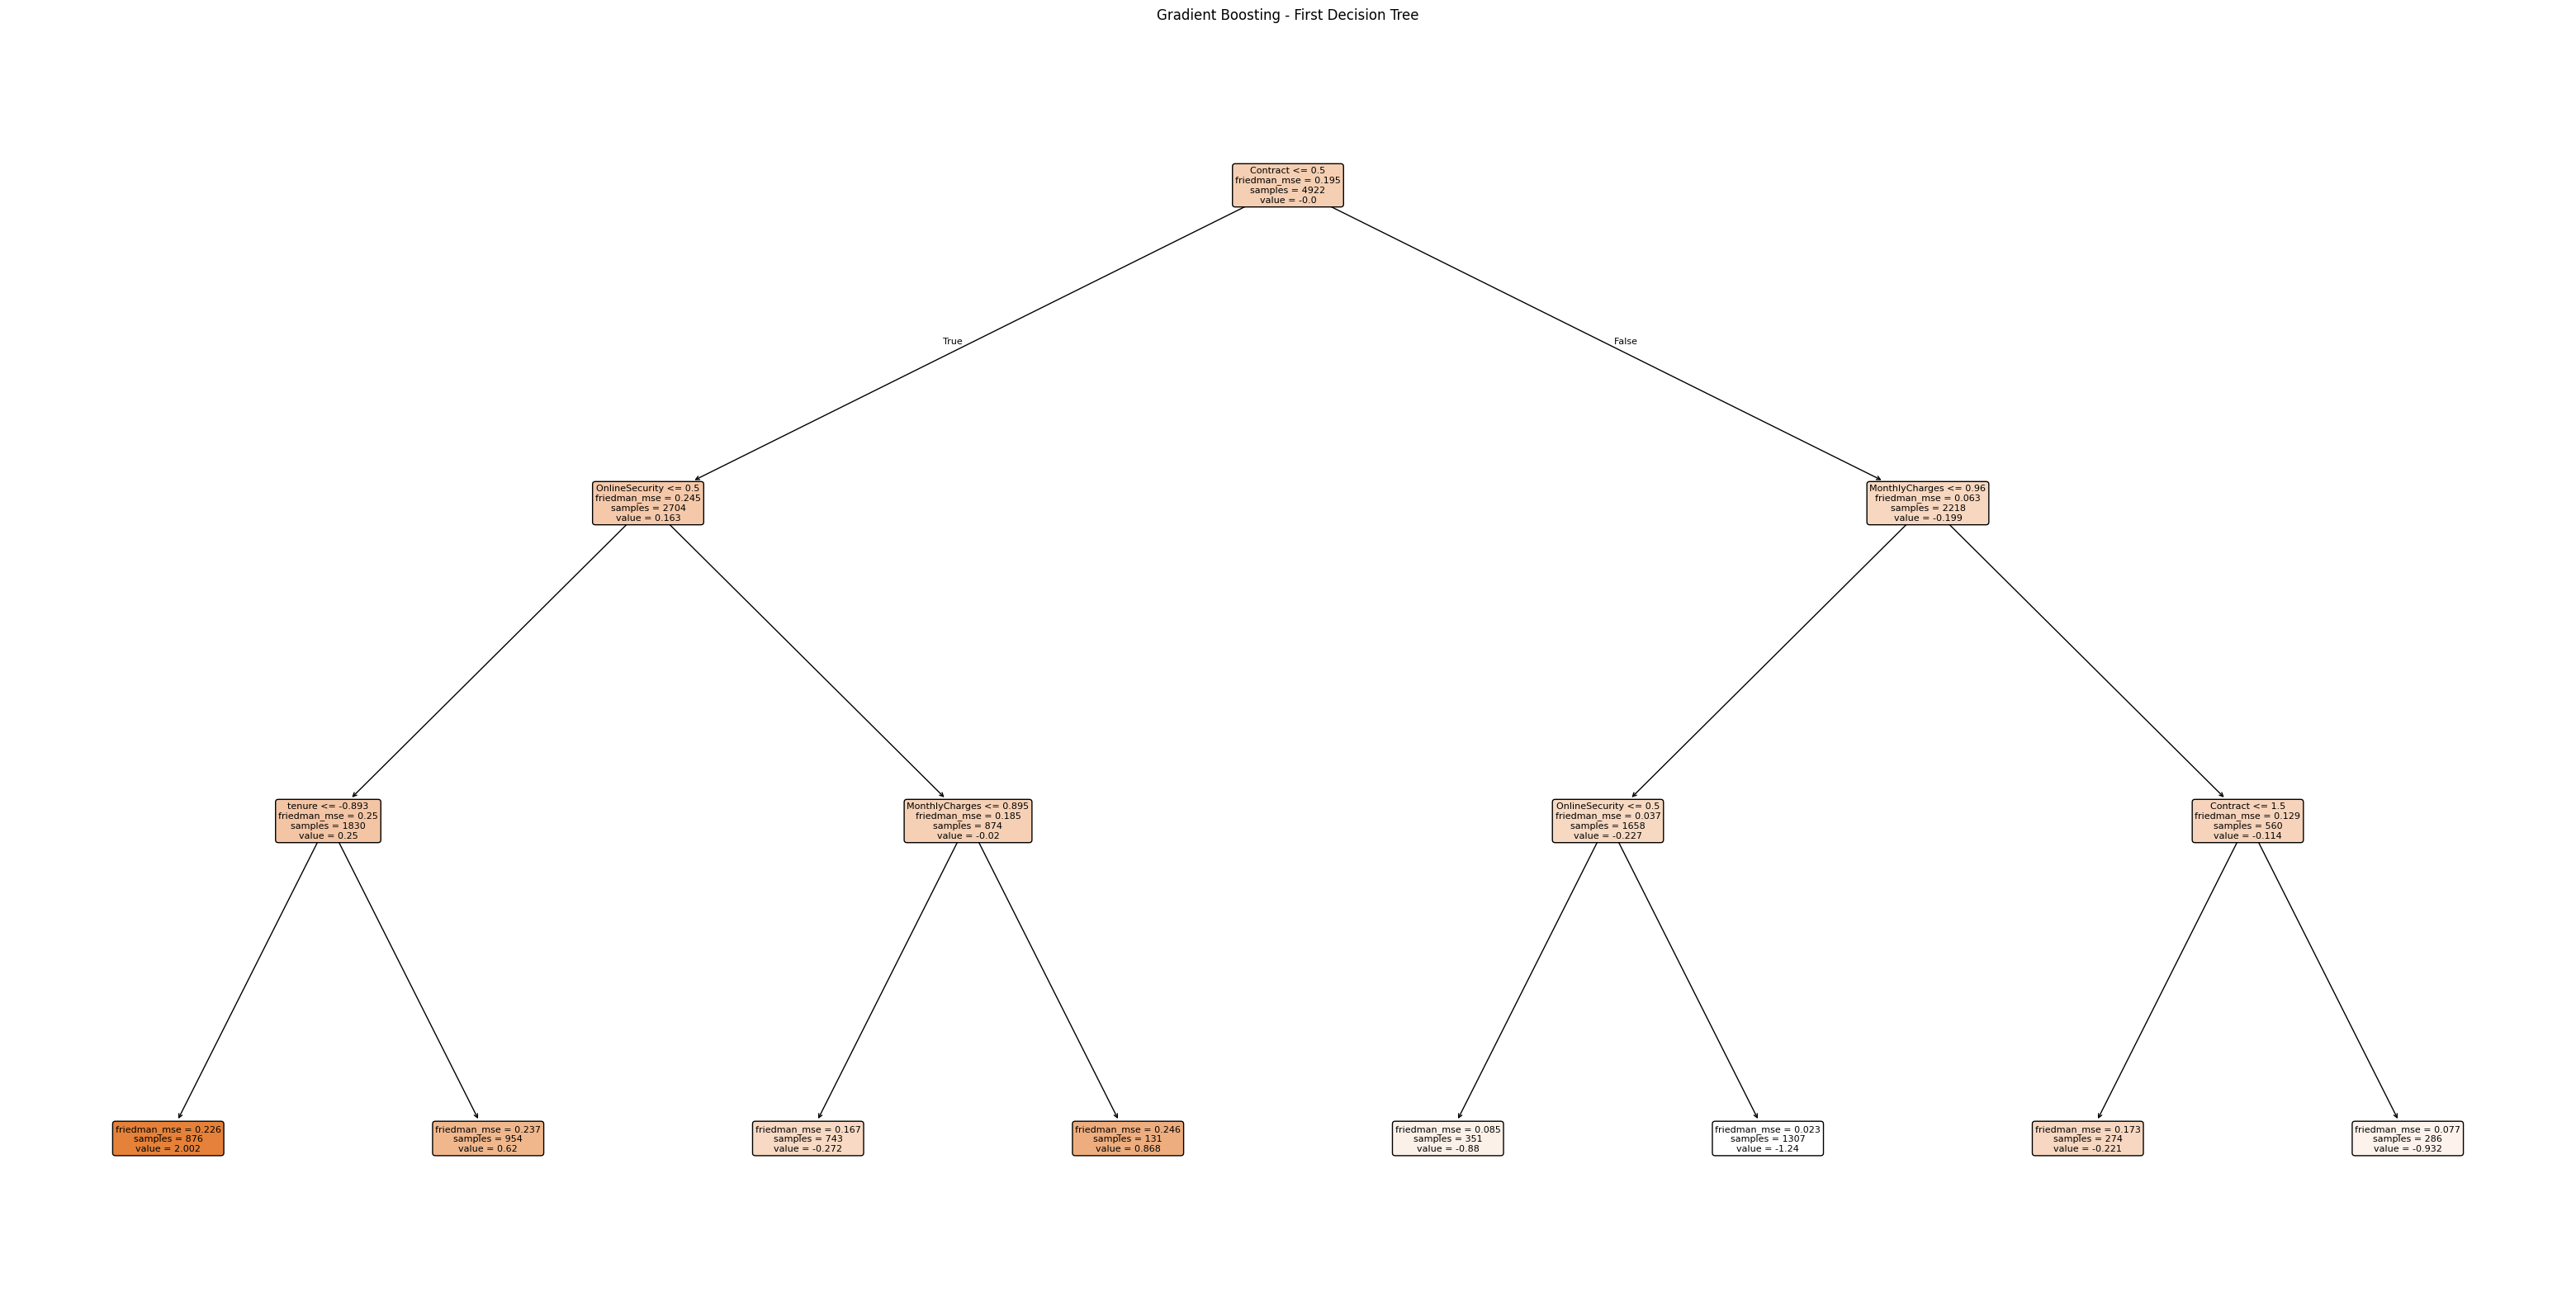

In [263]:
# Gradient Boosting Classifier Model

gb_model = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=400,
    max_depth=3,
    subsample=0.9,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test_scaled)

# Gradient Boosting Feature Importance Plot
# Extract feature importances
gb_importances = gb_model.feature_importances_
feature_names = X.columns  # original feature names

# Sort by importance (largest → smallest)
indices = np.argsort(gb_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), gb_importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.gca().invert_yaxis()  # important features at top
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

# Train Gradient Boosting 
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

# Select the first tree from the model
# Gradient Boosting stores trees in gb.estimators_[stage][class]
tree = gb.estimators_[0][0]     # stage 0, class 0 (binary classification)

# Plot the tree
plt.figure(figsize=(40, 20))
plot_tree(
    tree,
    feature_names=X_train.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Gradient Boosting - First Decision Tree")
plt.show()


Baseline Decision Tree Accuracy: 0.7407582938388626
Fitting 3 folds for each of 160 candidates, totalling 480 fits

Best Parameters Found:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20}
Tuned Decision Tree Accuracy: 0.7777251184834123


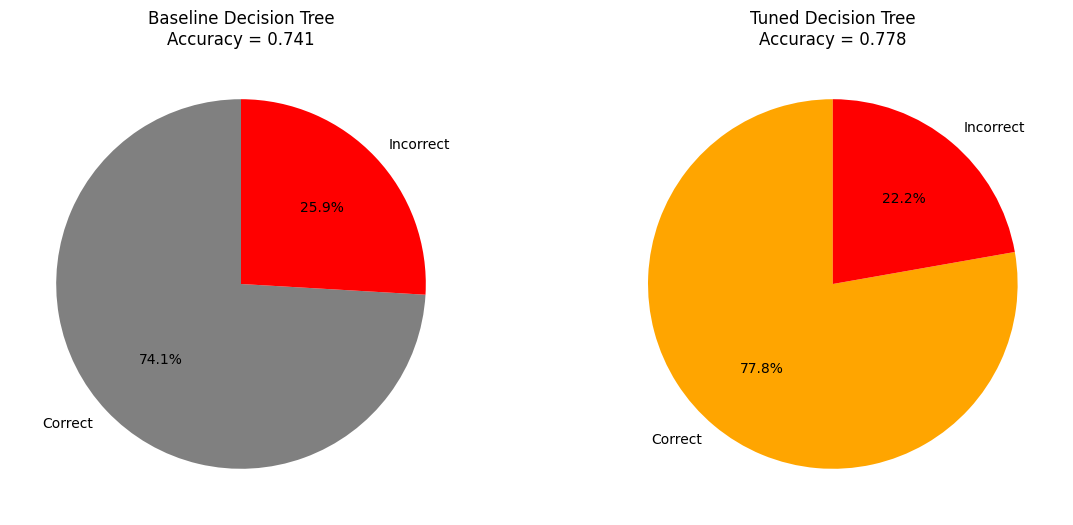

In [39]:
# Hyperparameter Tuning  with GridSearchCV for Decision Tree

# Baseline Decision Tree
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train_scaled, y_train)

baseline_pred = baseline_dt.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

print("Baseline Decision Tree Accuracy:", baseline_accuracy)

# GridSearchCV Tuning
param_grid = {
    'max_depth': [3, 5, 8, 12, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(X_train_scaled, y_train)

print("\nBest Parameters Found:")
print(grid_search_dt.best_params_)

# Best model
best_dt = grid_search_dt.best_estimator_

# Tuned Model Evaluation
tuned_pred = best_dt.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, tuned_pred)

print("Tuned Decision Tree Accuracy:", tuned_accuracy)

# Pie Chart Comparasion
# Compute correct / incorrect counts
baseline_correct = (baseline_pred == y_test).sum()
baseline_incorrect = (baseline_pred != y_test).sum()

tuned_correct = (tuned_pred == y_test).sum()
tuned_incorrect = (tuned_pred != y_test).sum()

# Plot side-by-side pies
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Baseline Pie 
axes[0].pie(
    [baseline_correct, baseline_incorrect],
    labels=["Correct", "Incorrect"],
    autopct="%1.1f%%",
    colors=["gray", "red"],
    startangle=90,
)
axes[0].set_title(f"Baseline Decision Tree\nAccuracy = {baseline_accuracy:.3f}")

# Tuned Pie 
axes[1].pie(
    [tuned_correct, tuned_incorrect],
    labels=["Correct", "Incorrect"],
    autopct="%1.1f%%",
    colors=["orange", "red"],
    startangle=90,
)
axes[1].set_title(f"Tuned Decision Tree\nAccuracy = {tuned_accuracy:.3f}")

plt.show()

Baseline Accuracy: 0.7843601895734598
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters Found:
{'bootstrap': True, 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model Accuracy: 0.7872037914691943


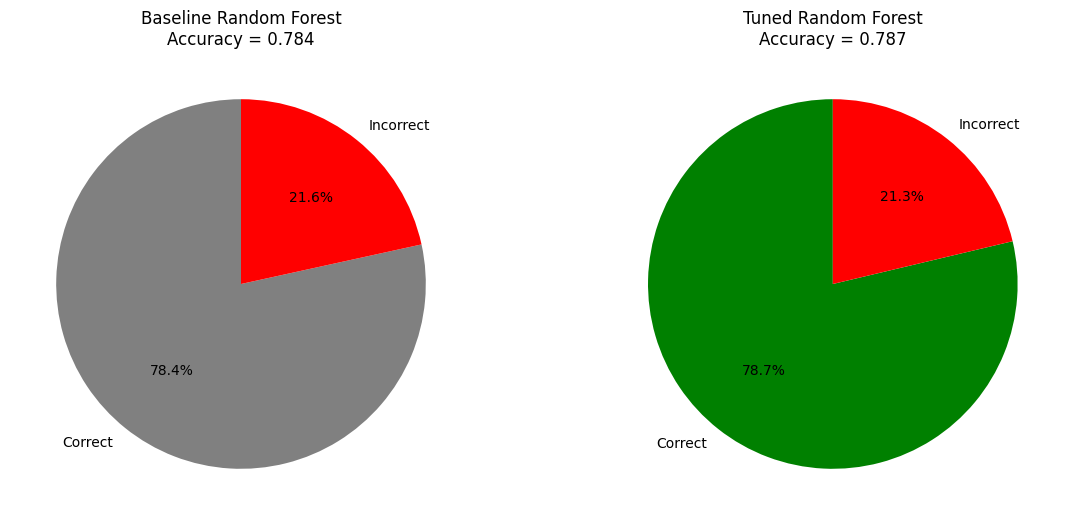

In [40]:
# Hyperparameter Tuning with GridSearchCV for Random Forest

# Baseline Random Forest
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train_scaled, y_train)

baseline_pred = baseline_rf.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

print("Baseline Accuracy:", baseline_accuracy)

# GridSearchCV Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8, 12, None],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("\nBest Parameters Found:")
print(grid_search.best_params_)

# Use the best discovered model
best_rf = grid_search.best_estimator_

# Evaluate Tuned Model
tuned_pred = best_rf.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, tuned_pred)

print("Tuned Model Accuracy:", tuned_accuracy)

# Pie Chart Comparison 
# Compute correct / incorrect counts
baseline_correct = (baseline_pred == y_test).sum()
baseline_incorrect = (baseline_pred != y_test).sum()

tuned_correct = (tuned_pred == y_test).sum()
tuned_incorrect = (tuned_pred != y_test).sum()

# Plot side-by-side pies
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Baseline Pie
axes[0].pie(
    [baseline_correct, baseline_incorrect],
    labels=["Correct", "Incorrect"],
    autopct="%1.1f%%",
    colors=["gray", "red"],
    startangle=90,
)
axes[0].set_title(f"Baseline Random Forest\nAccuracy = {baseline_accuracy:.3f}")

# Tuned Pie 
axes[1].pie(
    [tuned_correct, tuned_incorrect],
    labels=["Correct", "Incorrect"],
    autopct="%1.1f%%",
    colors=["green", "red"],
    startangle=90,
)
axes[1].set_title(f"Tuned Random Forest\nAccuracy = {tuned_accuracy:.3f}")

plt.show()
